In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [12]:
# Load the CSV file
df = pd.read_csv(r"C:\Users\Administrator\Desktop\Vinuwara_IRP_A.I.D.S_2024\Code\Dataset\disdrict distribution 2020-2021.csv")

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%Y')

# List of districts to process
districts = ['AMPARA', 'ANURADHAPURA', 'BADULLA', 'BATTICALOA', 'COLOMBO', 'GALLE', 'GAMPAHA',
             'HAMBANTOTA', 'JAFFNA', 'NUWARA ELIYA', 'POLONNARUWA', 'PUTTALAM', 'RATNAPURA',
             'TRINCOMALEE', 'VAVUNIYA']



In [13]:
display(df.head())

,Date,AMPARA,ANURADHAPURA,BADULLA,BATTICALOA,COLOMBO,GALLE,GAMPAHA,HAMBANTOTA,JAFFNA,...,NUWARA ELIYA,POLONNARUWA,PUTTALAM,RATNAPURA,TRINCOMALEE,VAVUNIYA,Susceptible,Infected,Recovered,Deaths
0,2020-04-01,0,0,1,1,32,1,11,0,1,...,0,0,25,3,0,0,23229364,106,18,2
1,2020-04-02,0,0,1,1,33,1,11,0,4,...,0,0,25,3,0,0,23229359,111,21,3
2,2020-04-03,0,0,1,1,36,1,11,0,4,...,0,0,25,3,0,0,23229356,114,22,4
3,2020-04-04,0,0,1,1,38,1,11,0,7,...,0,0,26,3,0,0,23229349,121,25,5
4,2020-04-05,0,0,1,1,42,1,11,0,7,...,0,0,27,3,0,0,23229342,128,29,5


In [14]:
# SIR Model Functions
def fa(N, a, b, beta):
    return -beta * a * b

def fb(N, a, b, beta, gamma):
    return beta * a * b - gamma * b

def fc(N, b, gamma):
    return gamma * b

def rK4(N, a, b, c, fa, fb, fc, beta, gamma, hs):
    a1 = fa(N, a, b, beta) * hs
    b1 = fb(N, a, b, beta, gamma) * hs
    c1 = fc(N, b, gamma) * hs
    ak = a + a1 * 0.5
    bk = b + b1 * 0.5
    ck = c + c1 * 0.5
    a2 = fa(N, ak, bk, beta) * hs
    b2 = fb(N, ak, bk, beta, gamma) * hs
    c2 = fc(N, bk, gamma) * hs
    ak = a + a2 * 0.5
    bk = b + b2 * 0.5
    ck = c + c2 * 0.5
    a3 = fa(N, ak, bk, beta) * hs
    b3 = fb(N, ak, bk, beta, gamma) * hs
    c3 = fc(N, bk, gamma) * hs
    ak = a + a3
    bk = b + b3
    ck = c + c3
    a4 = fa(N, ak, bk, beta) * hs
    b4 = fb(N, ak, bk, beta, gamma) * hs
    c4 = fc(N, bk, gamma) * hs
    a += (a1 + 2 * (a2 + a3) + a4) / 6
    b += (b1 + 2 * (b2 + b3) + b4) / 6
    c += (c1 + 2 * (c2 + c3) + c4) / 6
    return a, b, c

def SIR(N, b0, beta, gamma, hs, days):
    a = float(N - 1) / N - b0
    b = float(1) / N + b0
    c = 0.

    sus, inf, rec = [], [], []
    for i in range(days):
        sus.append(a)
        inf.append(b * N)  # Convert to actual number of infected
        rec.append(c)
        a, b, c = rK4(N, a, b, c, fa, fb, fc, beta, gamma, hs)

    return sus, inf, rec



In [15]:
# District population dictionary 
district_population = {
    'AMPARA': 752000,
    'ANURADHAPURA': 954000,
    'BADULLA': 895000,
    'BATTICALOA': 590000,
    'COLOMBO': 2480000,
    'GALLE': 1147000,
    'GAMPAHA': 2443000,
    'HAMBANTOTA': 676000,
    'JAFFNA': 626000,
    'NUWARA ELIYA': 780000,
    'POLONNARUWA': 448000,
    'PUTTALAM': 849000,
    'RATNAPURA': 1190000,
    'TRINCOMALEE': 441000,
    'VAVUNIYA': 194000
}

In [16]:
# Model Parameters
b0 = 0
beta = 0.3
gamma = 0.1
hs = 0.1
look_back = 15  # Time steps for LSTM
future_days = 30  # Days to predict into the future

Processing AMPARA...


d:\conda\envs\SIR_model\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


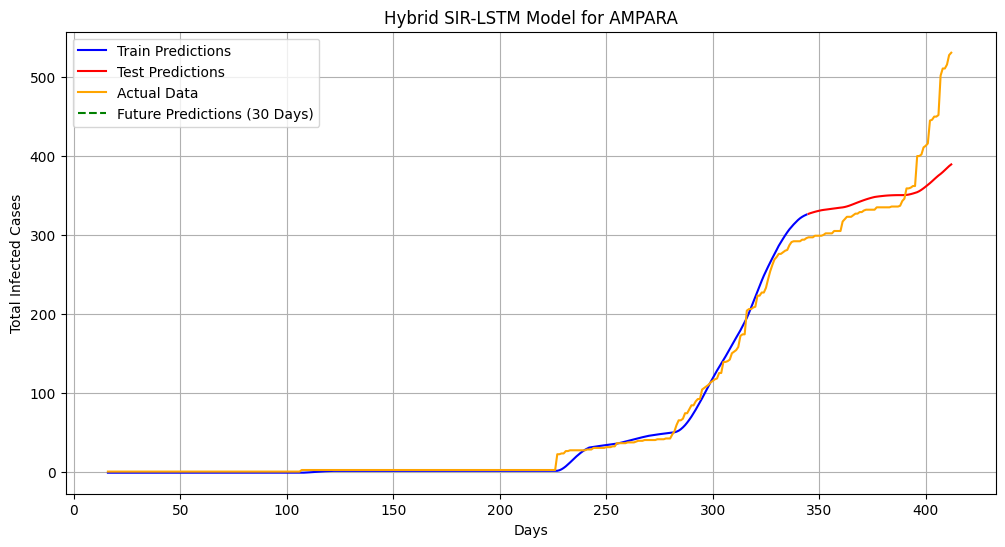

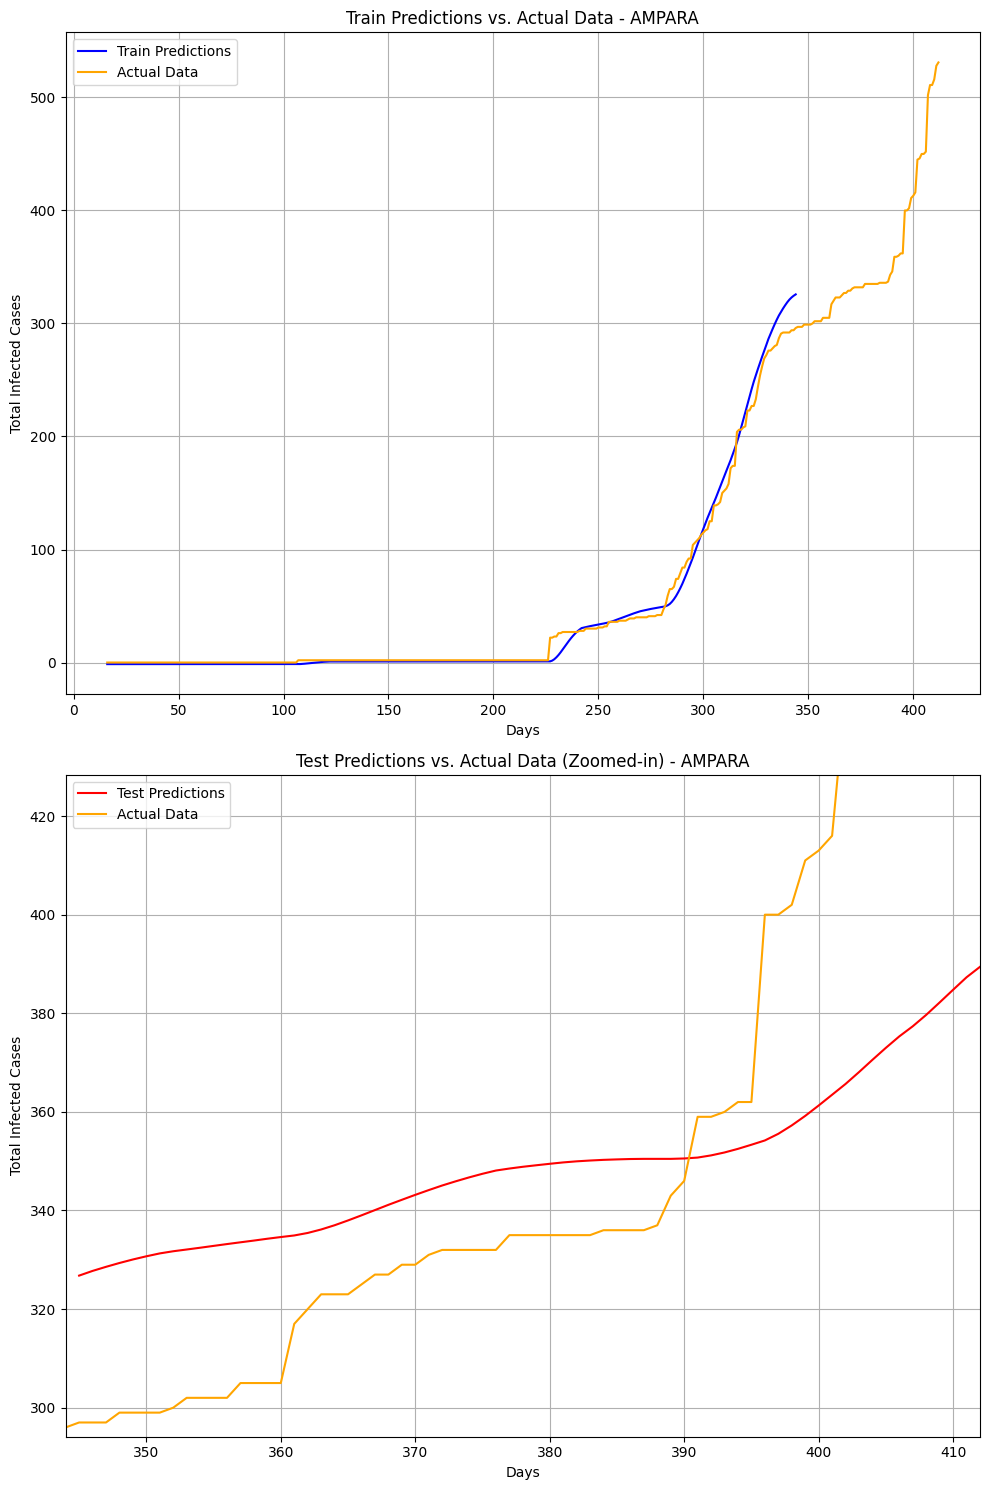

Processing ANURADHAPURA...


d:\conda\envs\SIR_model\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


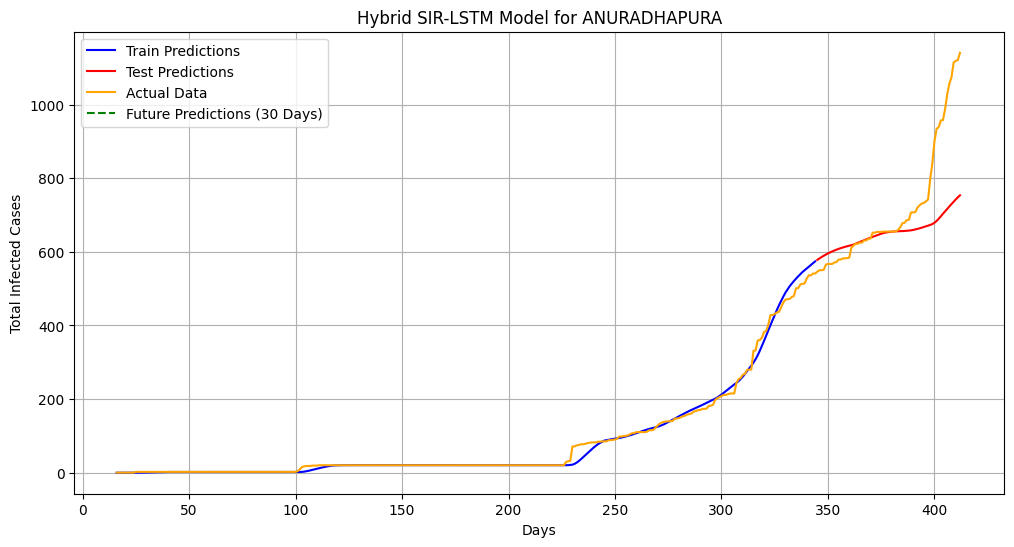

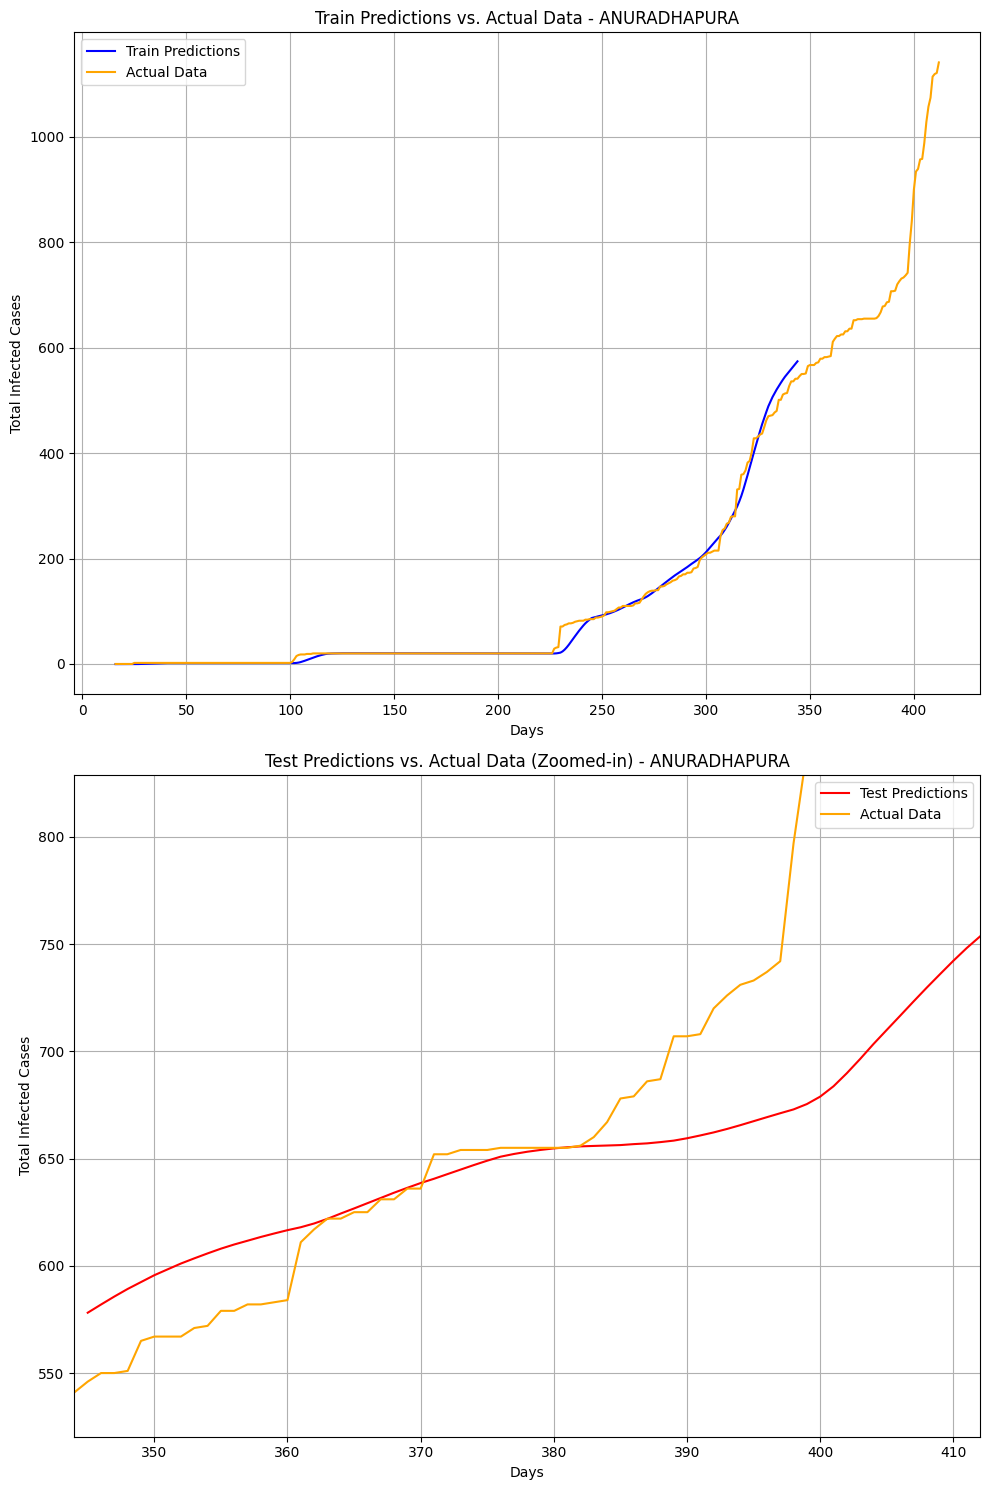

Processing BADULLA...


d:\conda\envs\SIR_model\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


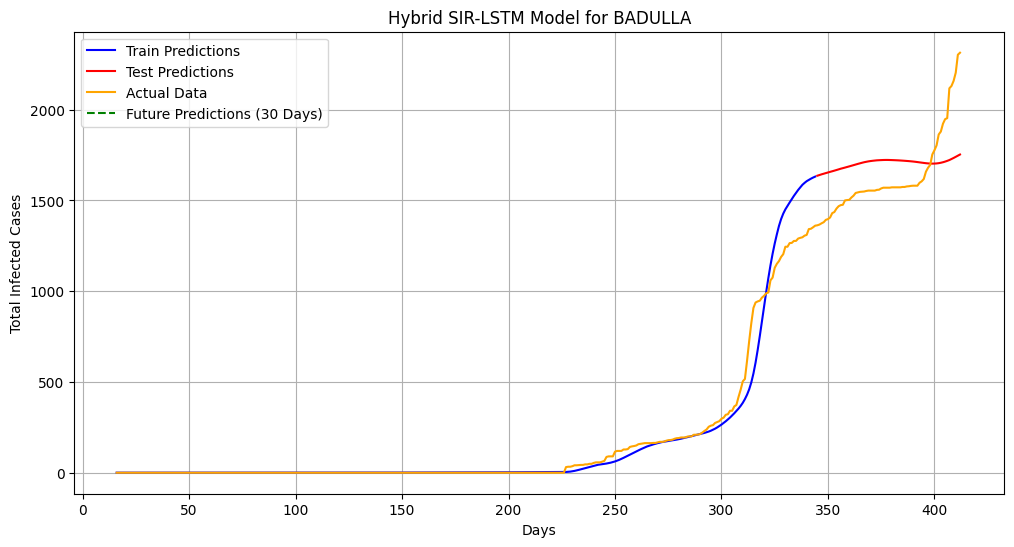

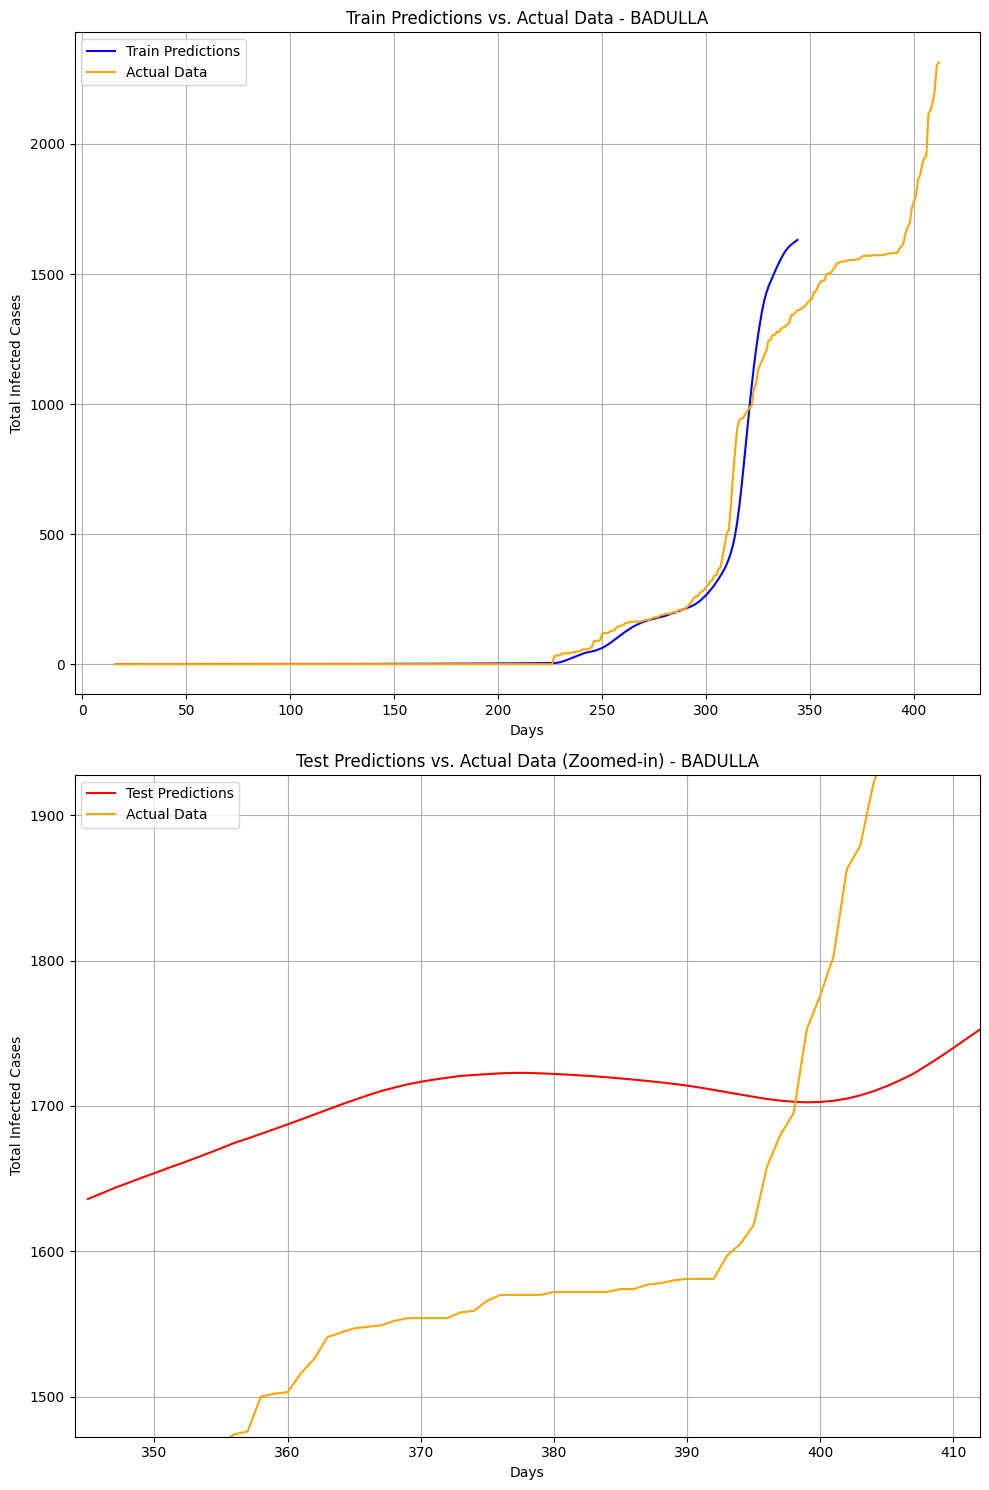

Processing BATTICALOA...


d:\conda\envs\SIR_model\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


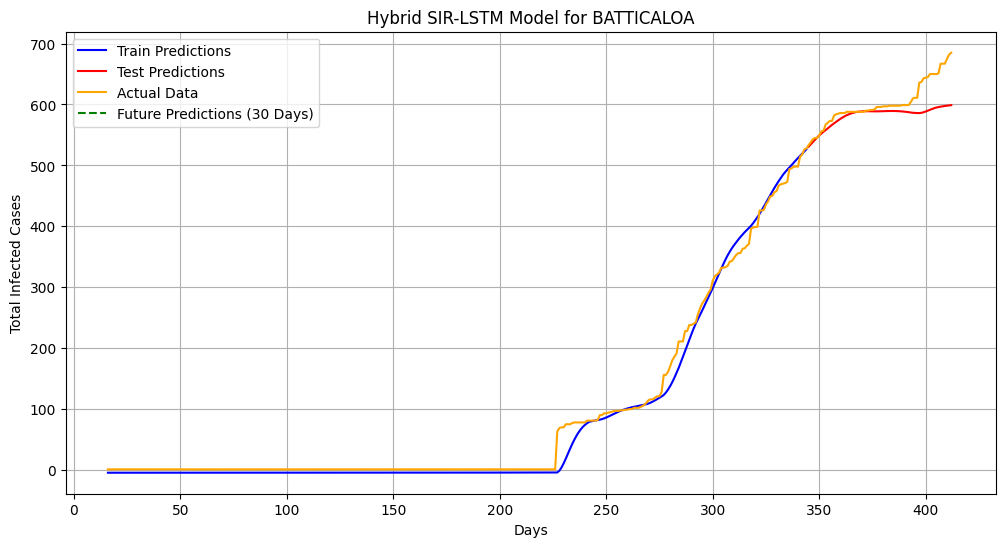

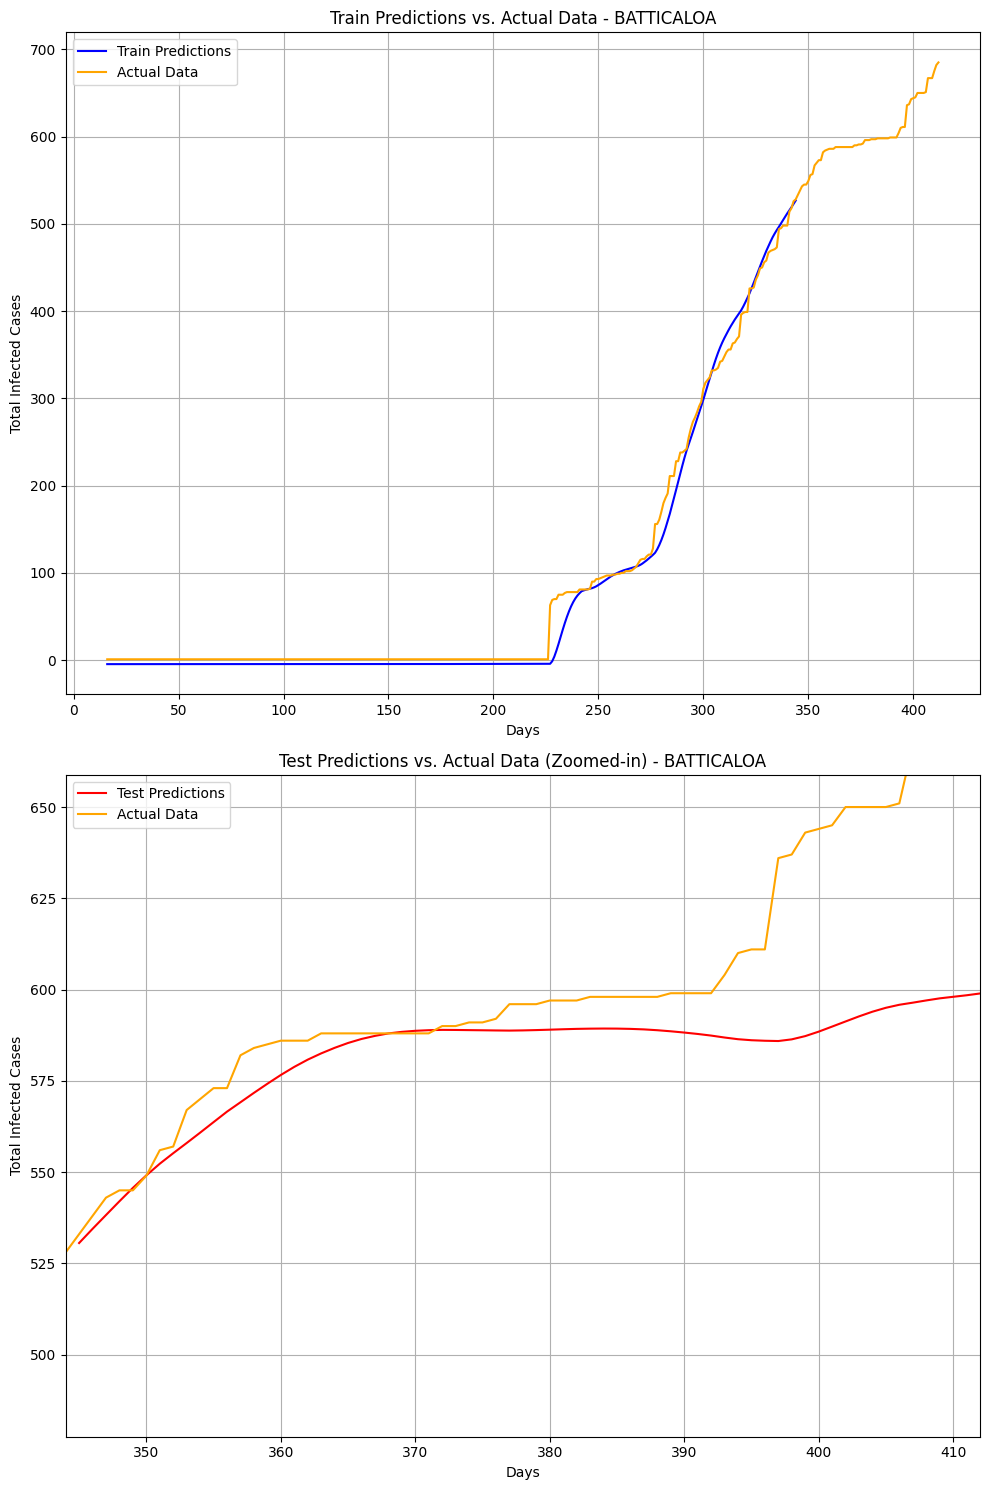

Processing COLOMBO...


d:\conda\envs\SIR_model\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


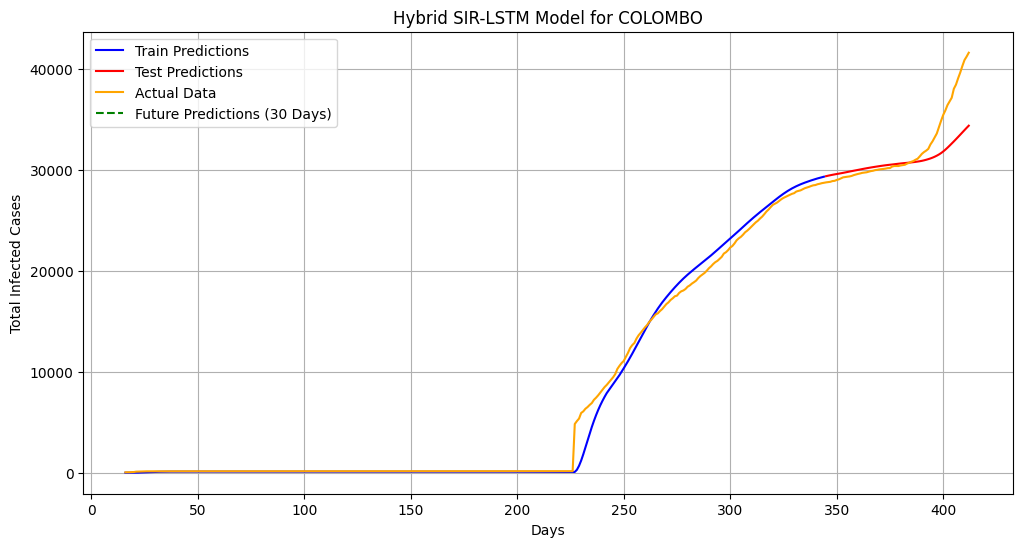

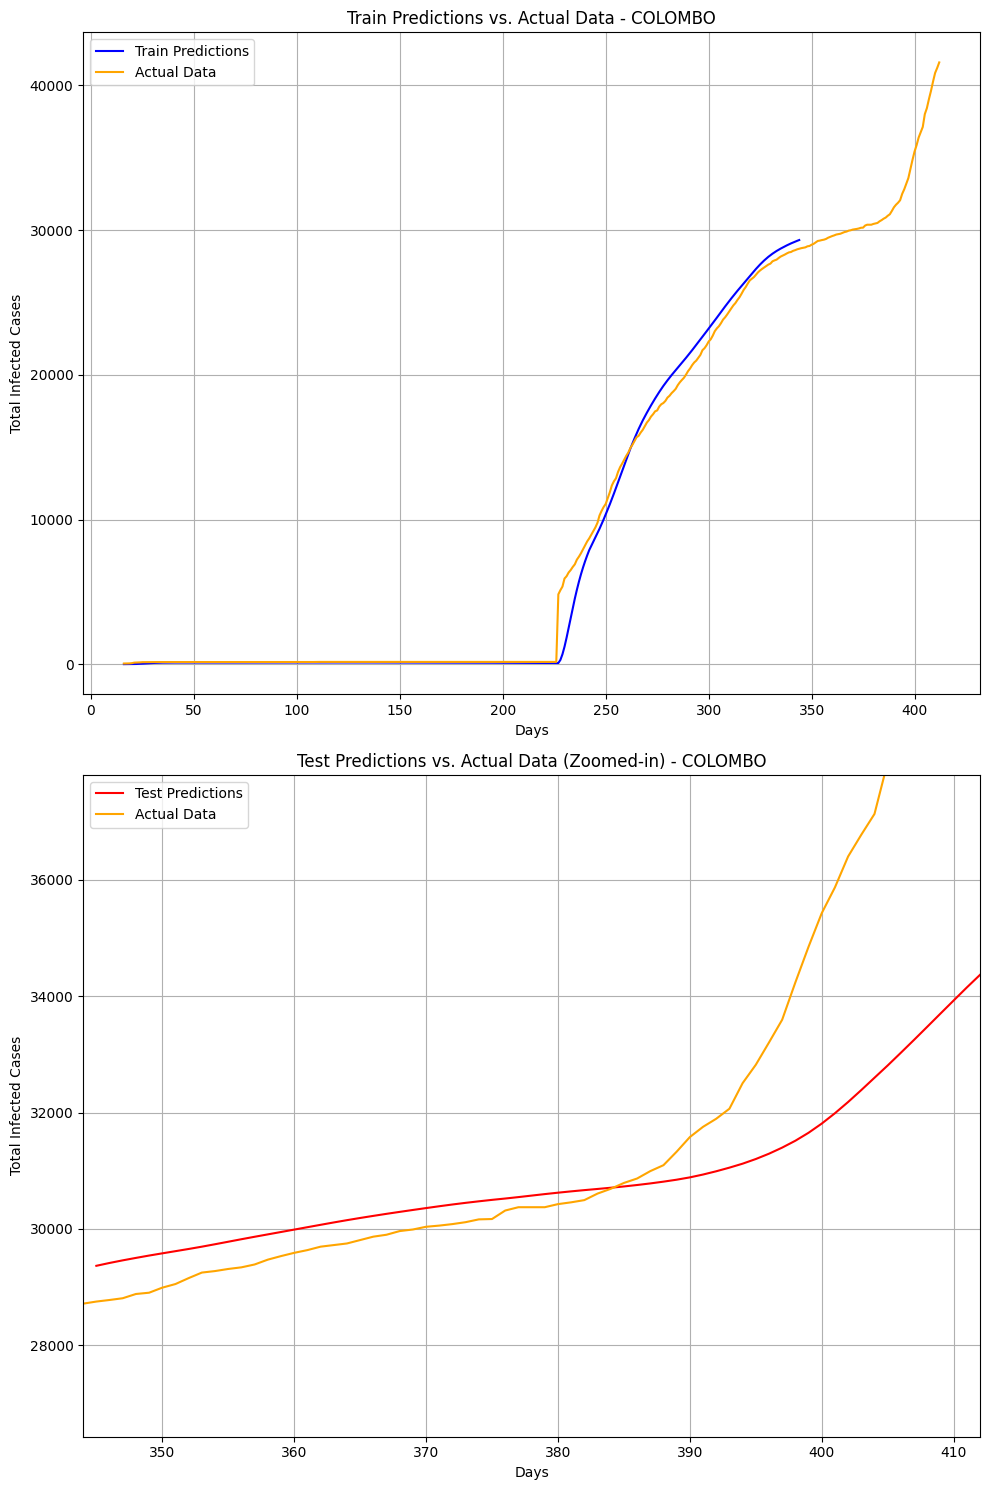

Processing GALLE...


d:\conda\envs\SIR_model\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


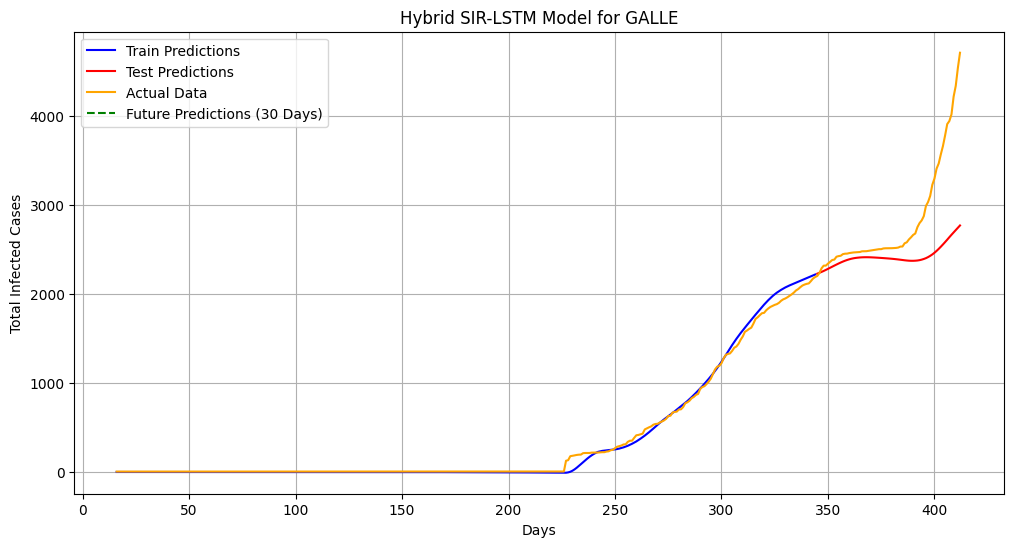

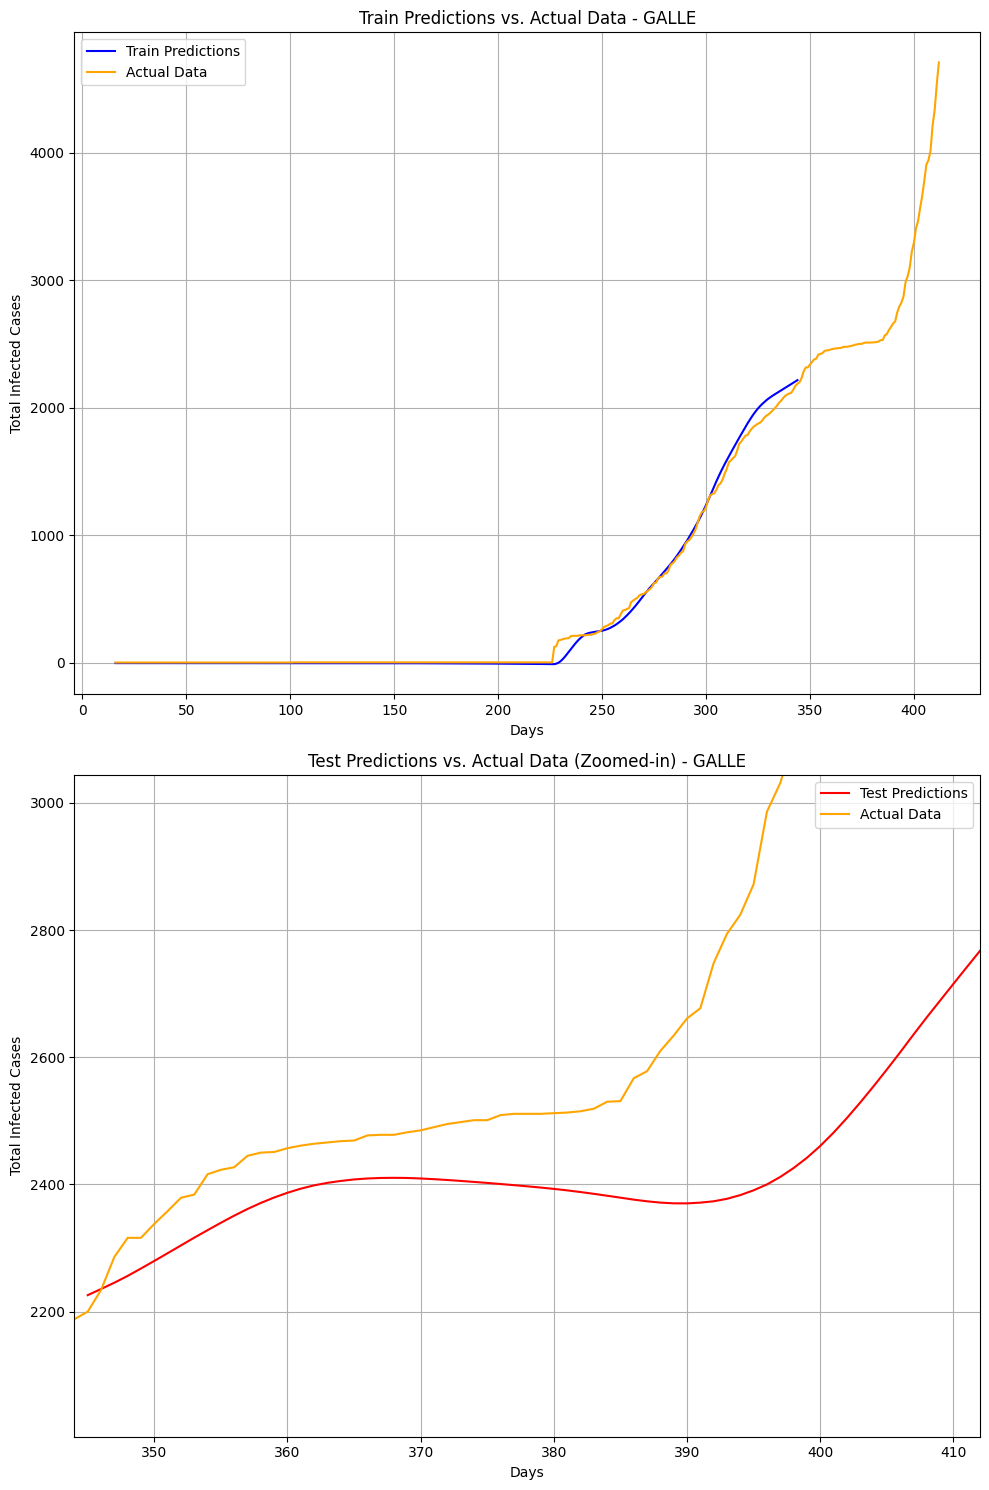

Processing GAMPAHA...


d:\conda\envs\SIR_model\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


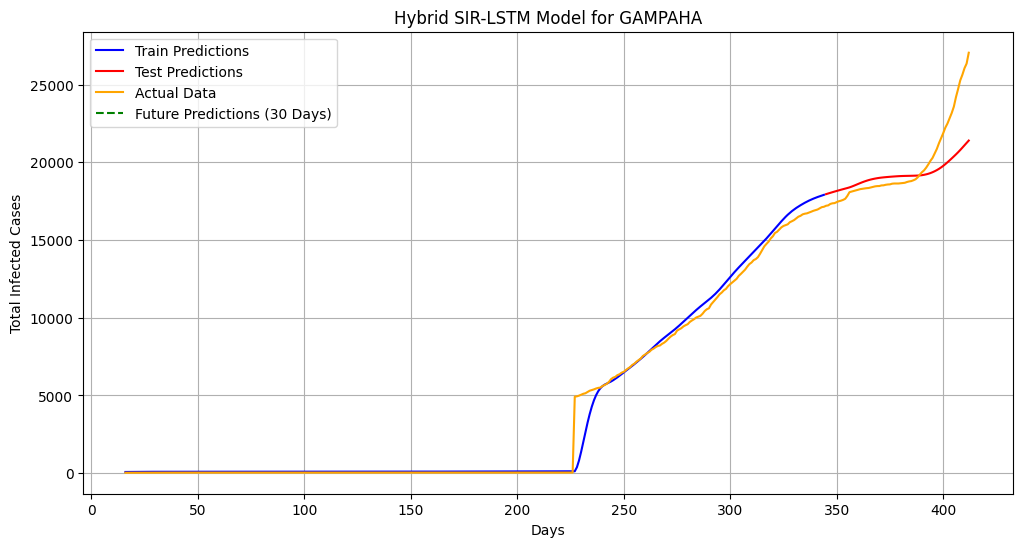

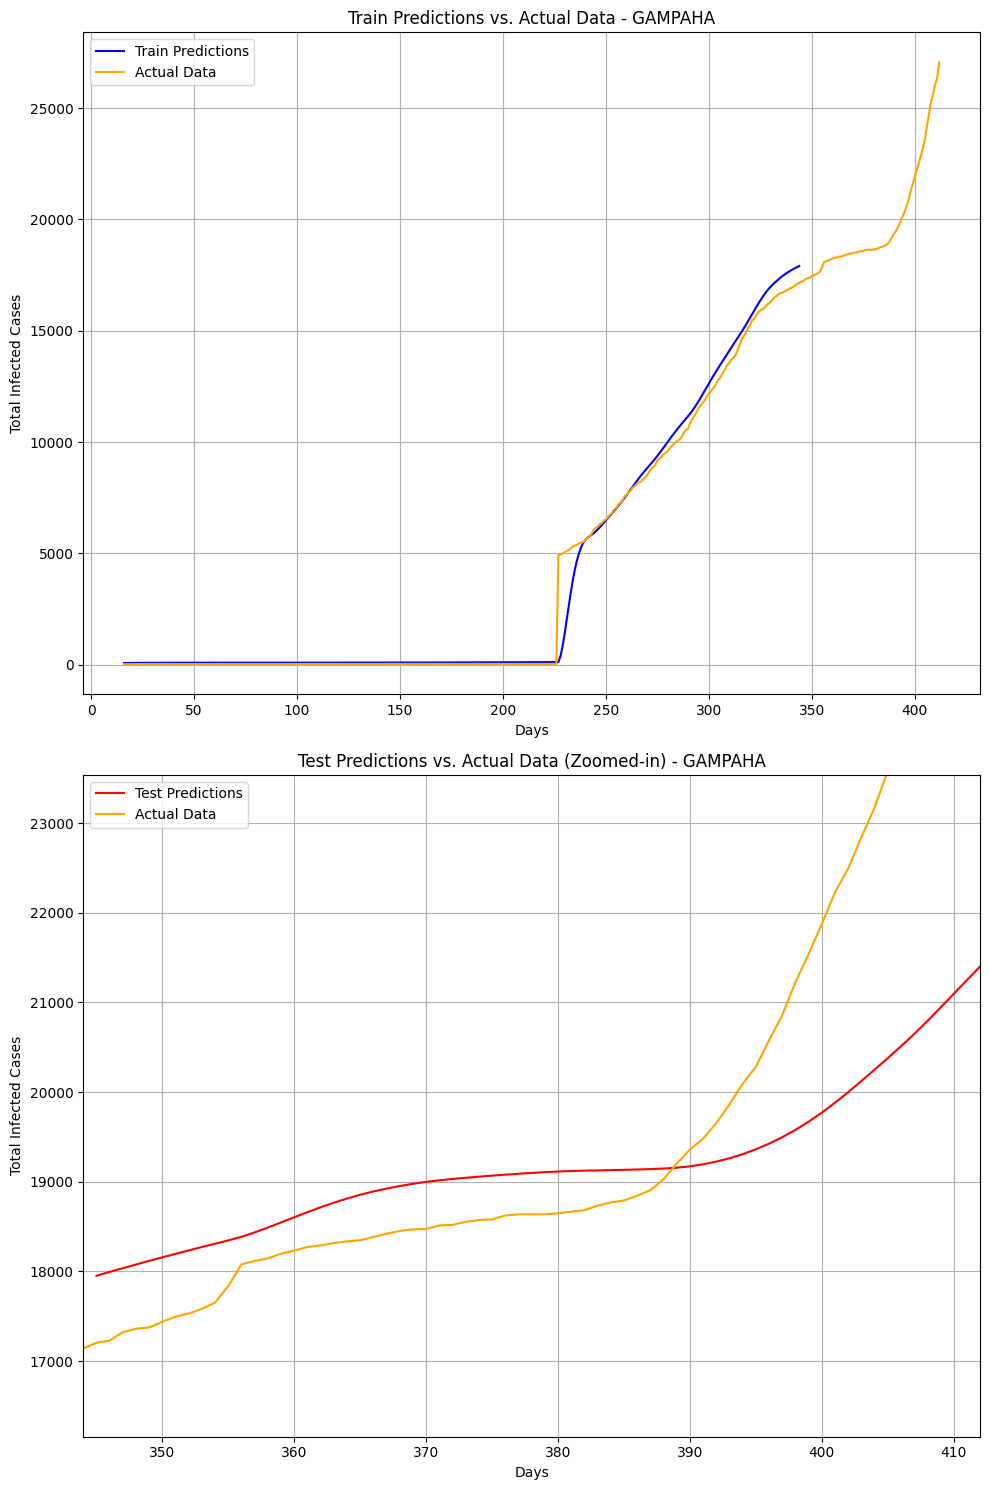

Processing HAMBANTOTA...


d:\conda\envs\SIR_model\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


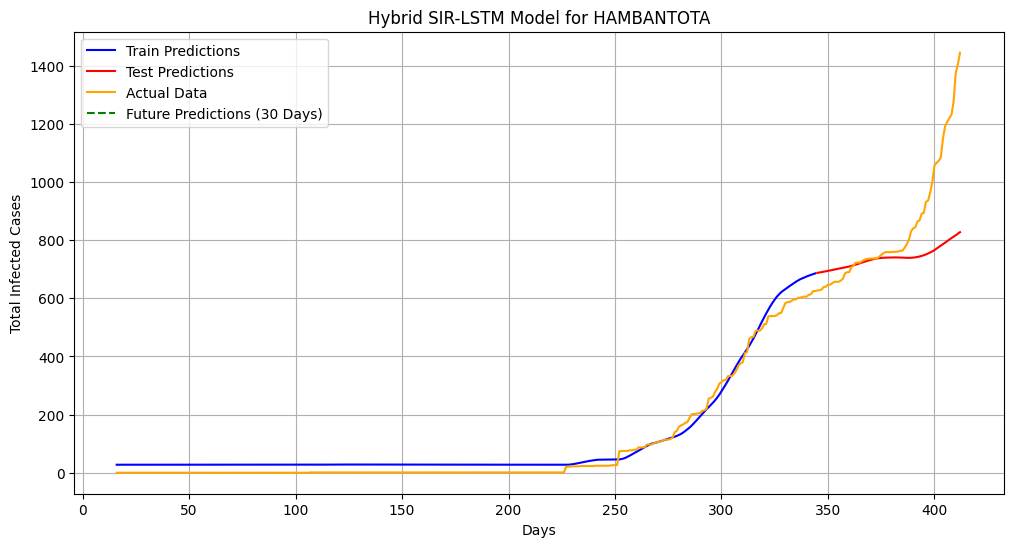

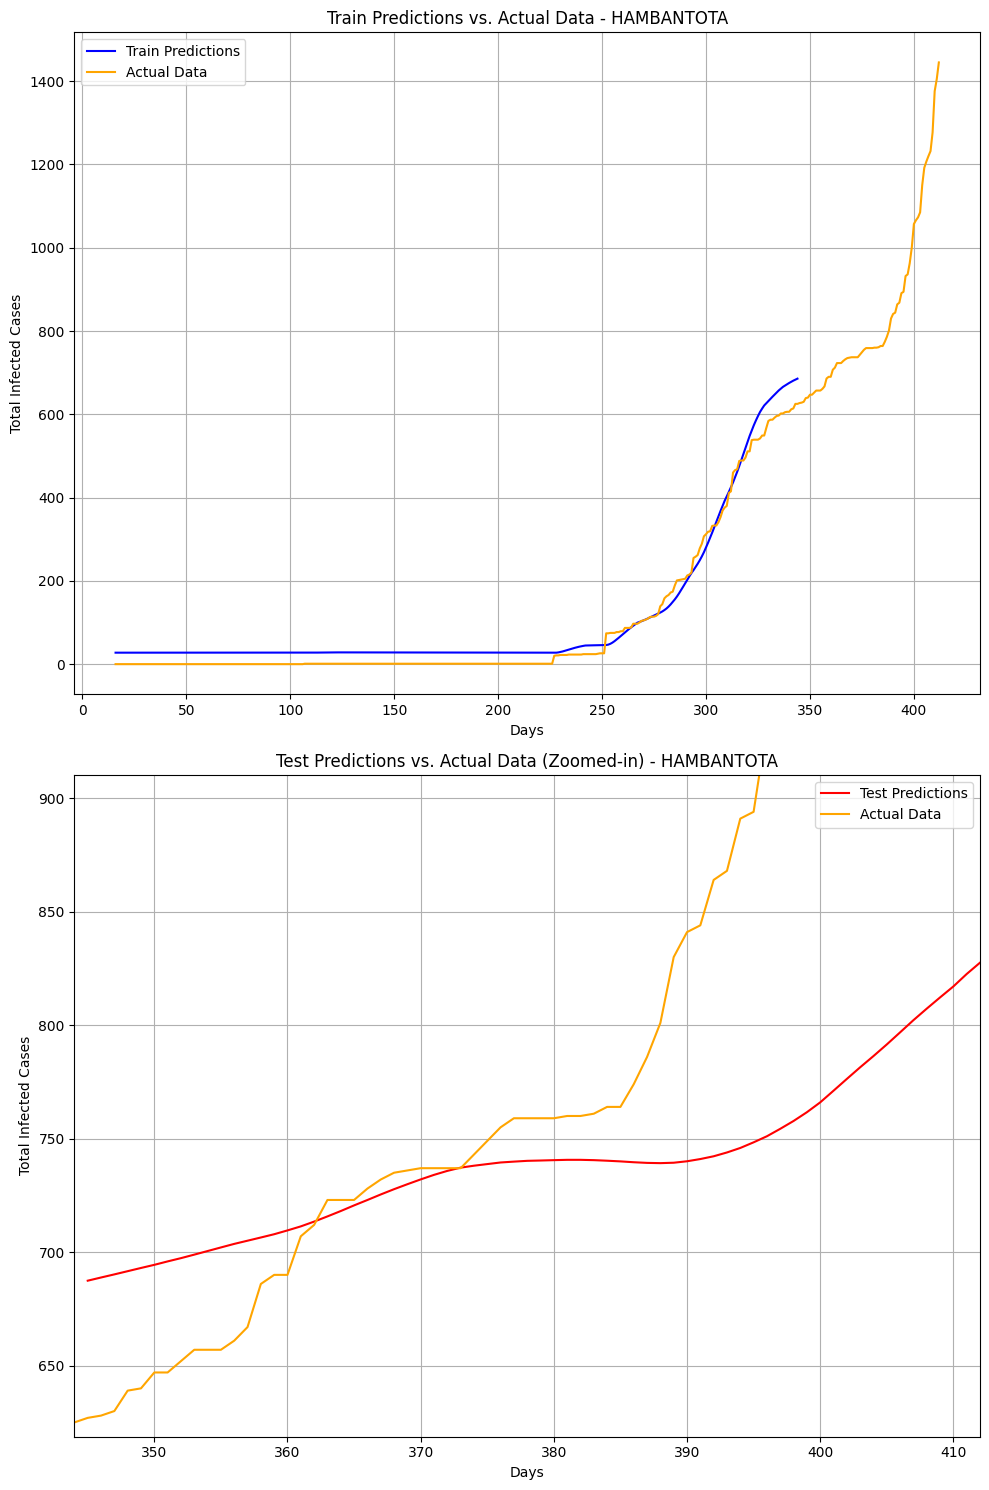

Processing JAFFNA...


d:\conda\envs\SIR_model\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


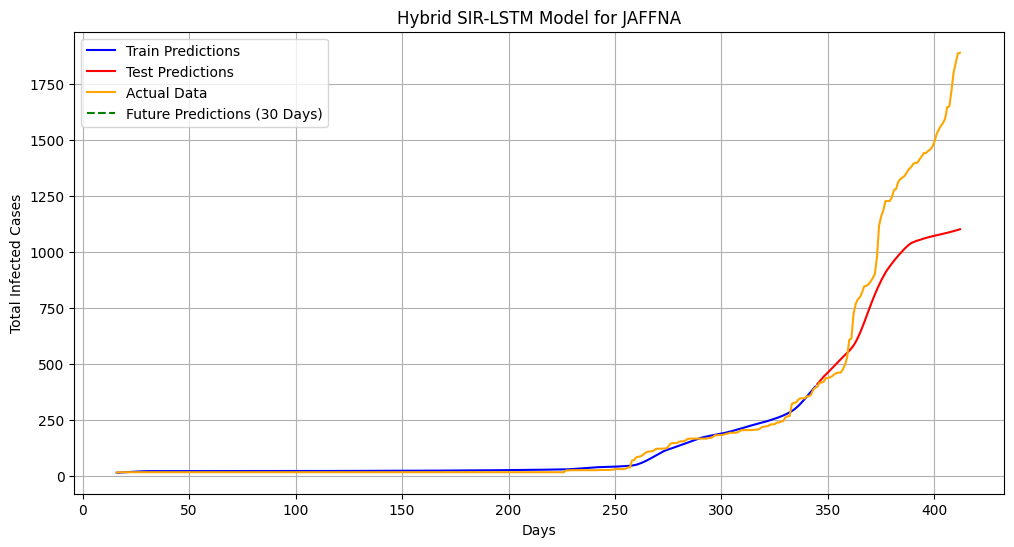

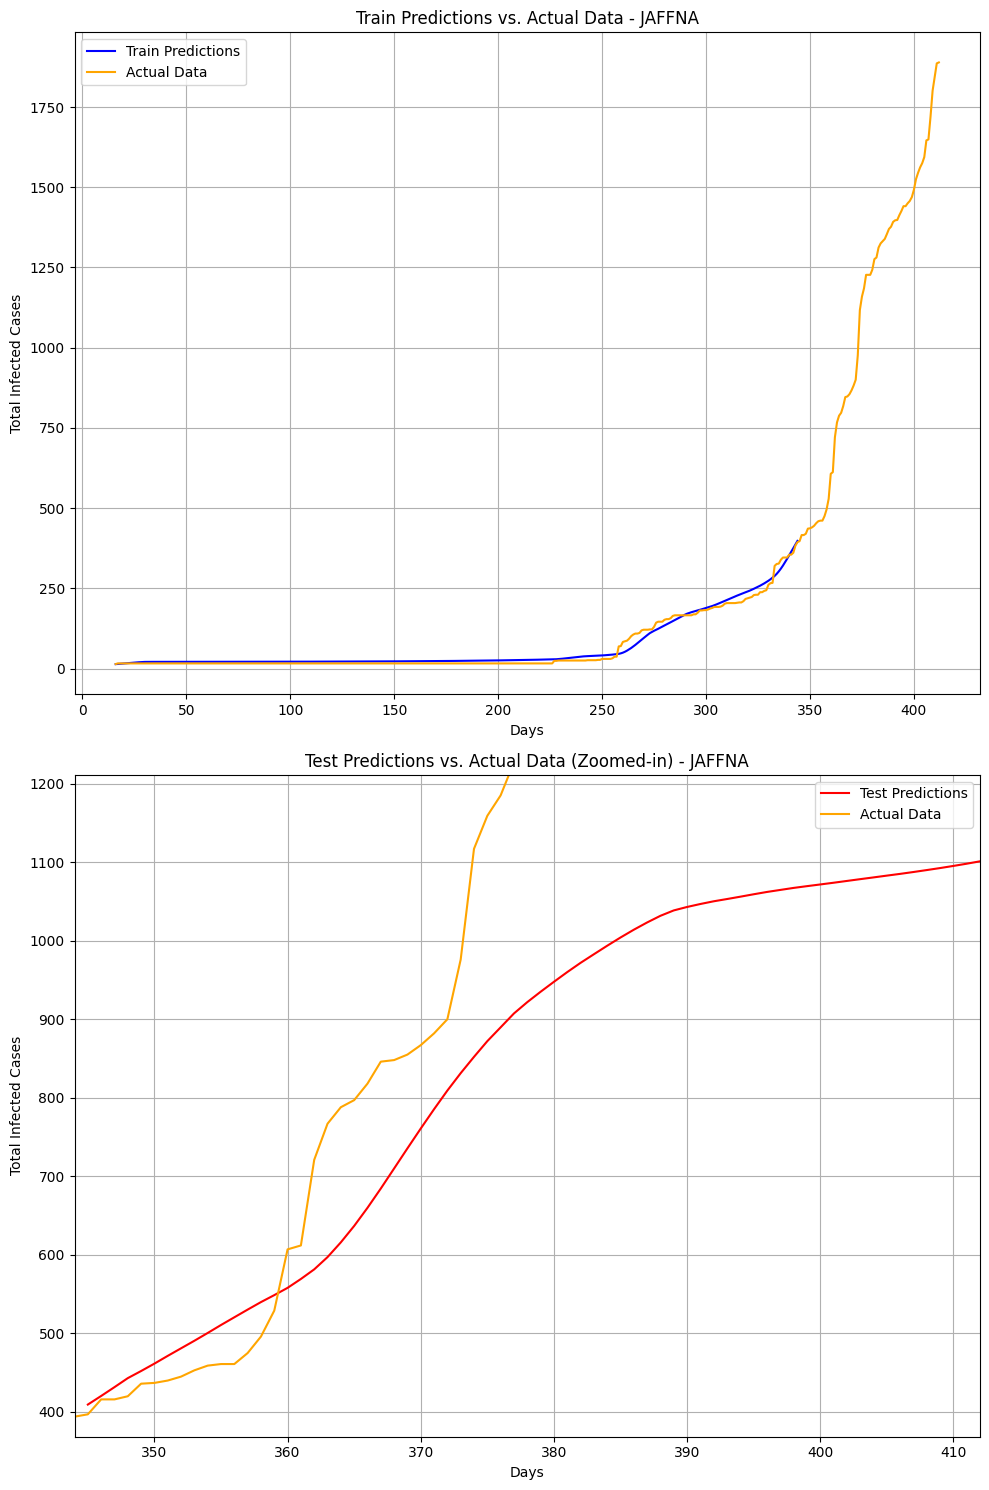

Processing NUWARA ELIYA...


d:\conda\envs\SIR_model\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


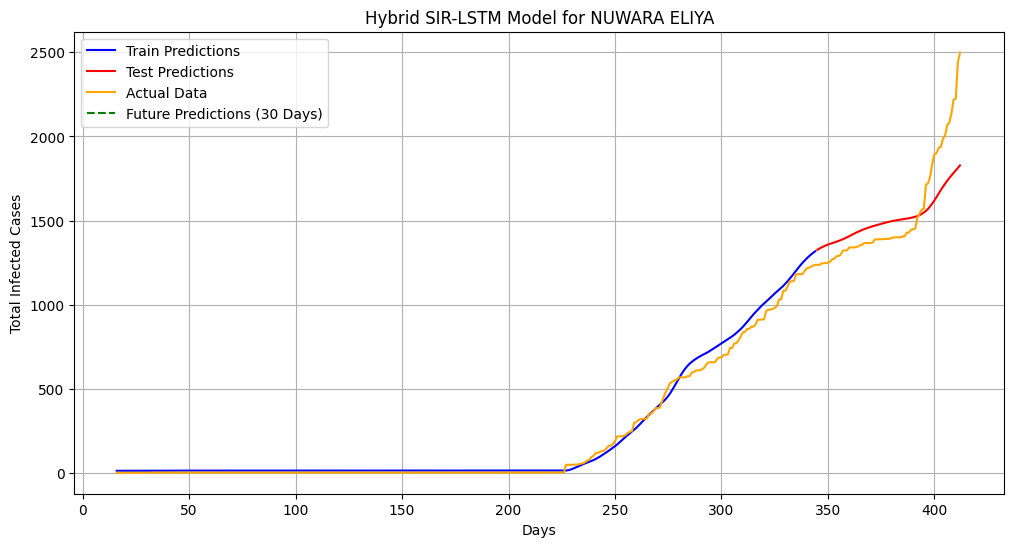

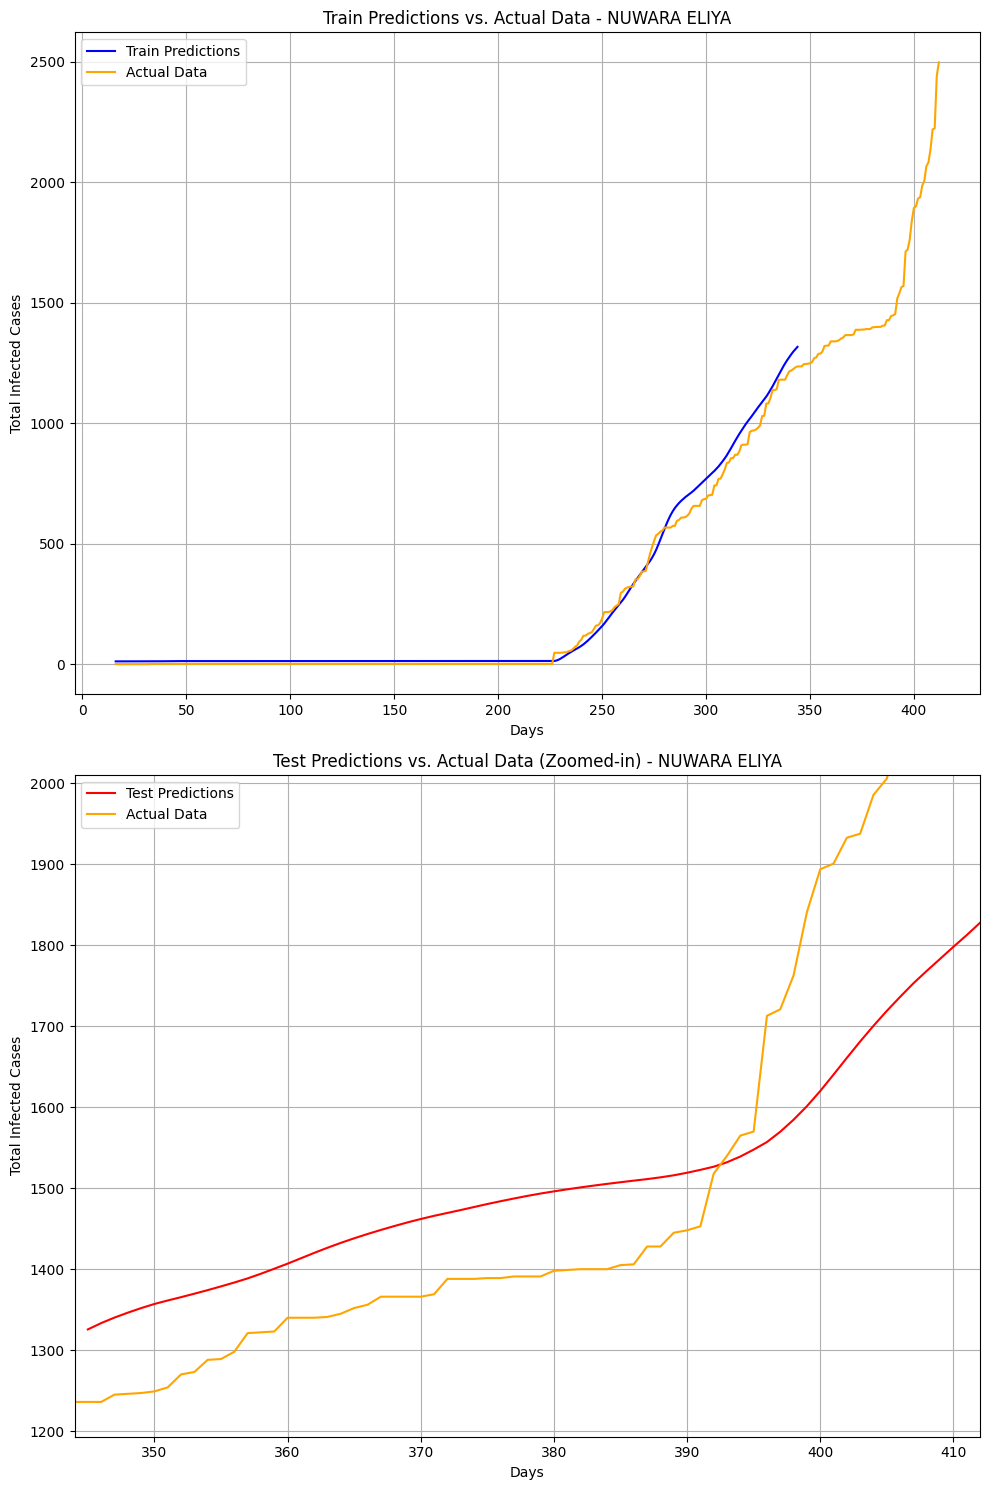

Processing POLONNARUWA...


d:\conda\envs\SIR_model\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


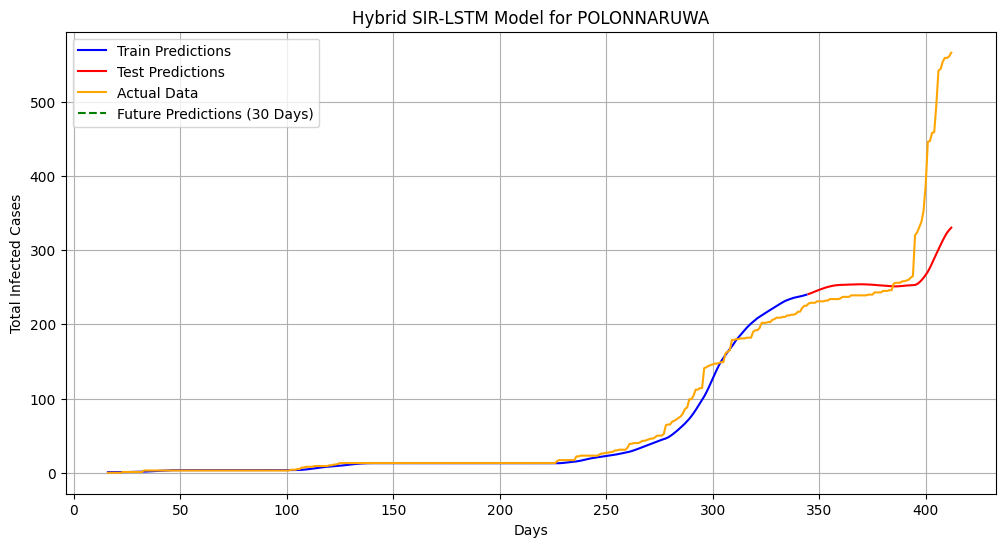

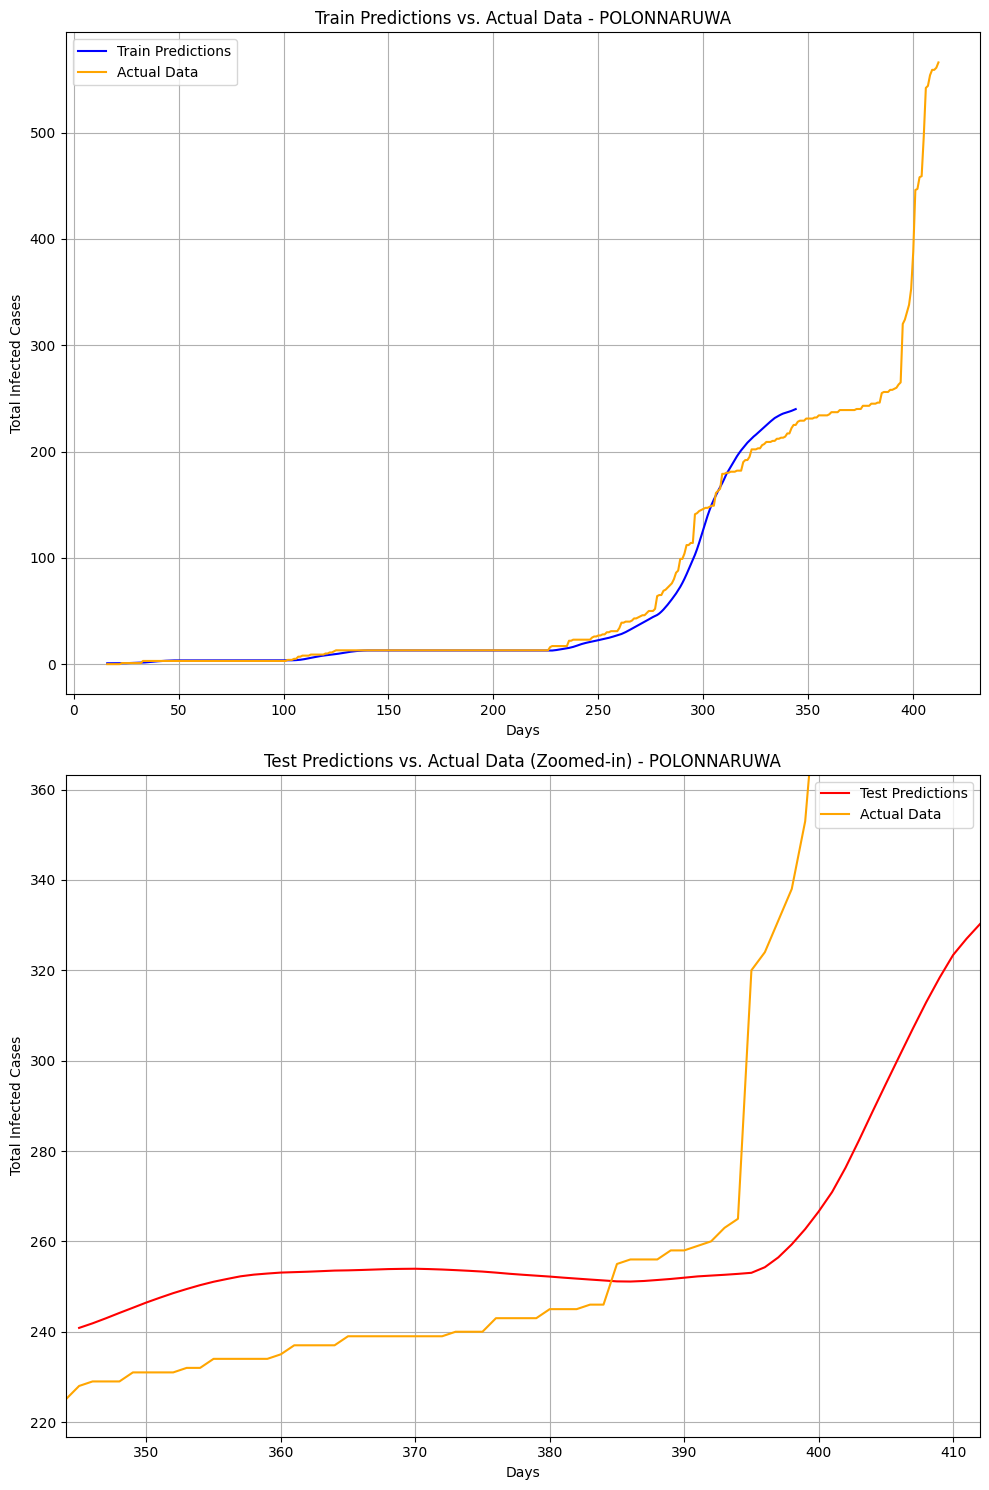

Processing PUTTALAM...


d:\conda\envs\SIR_model\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


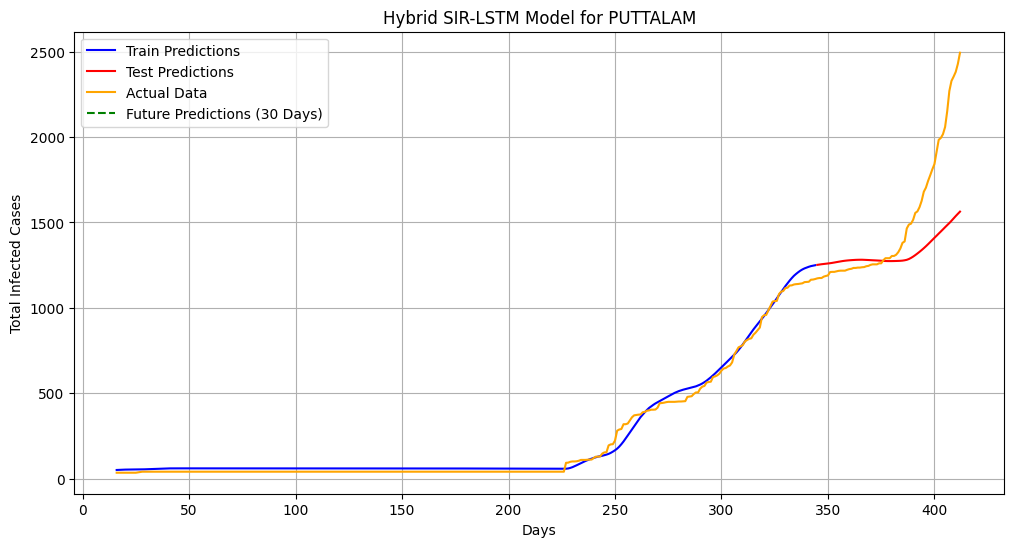

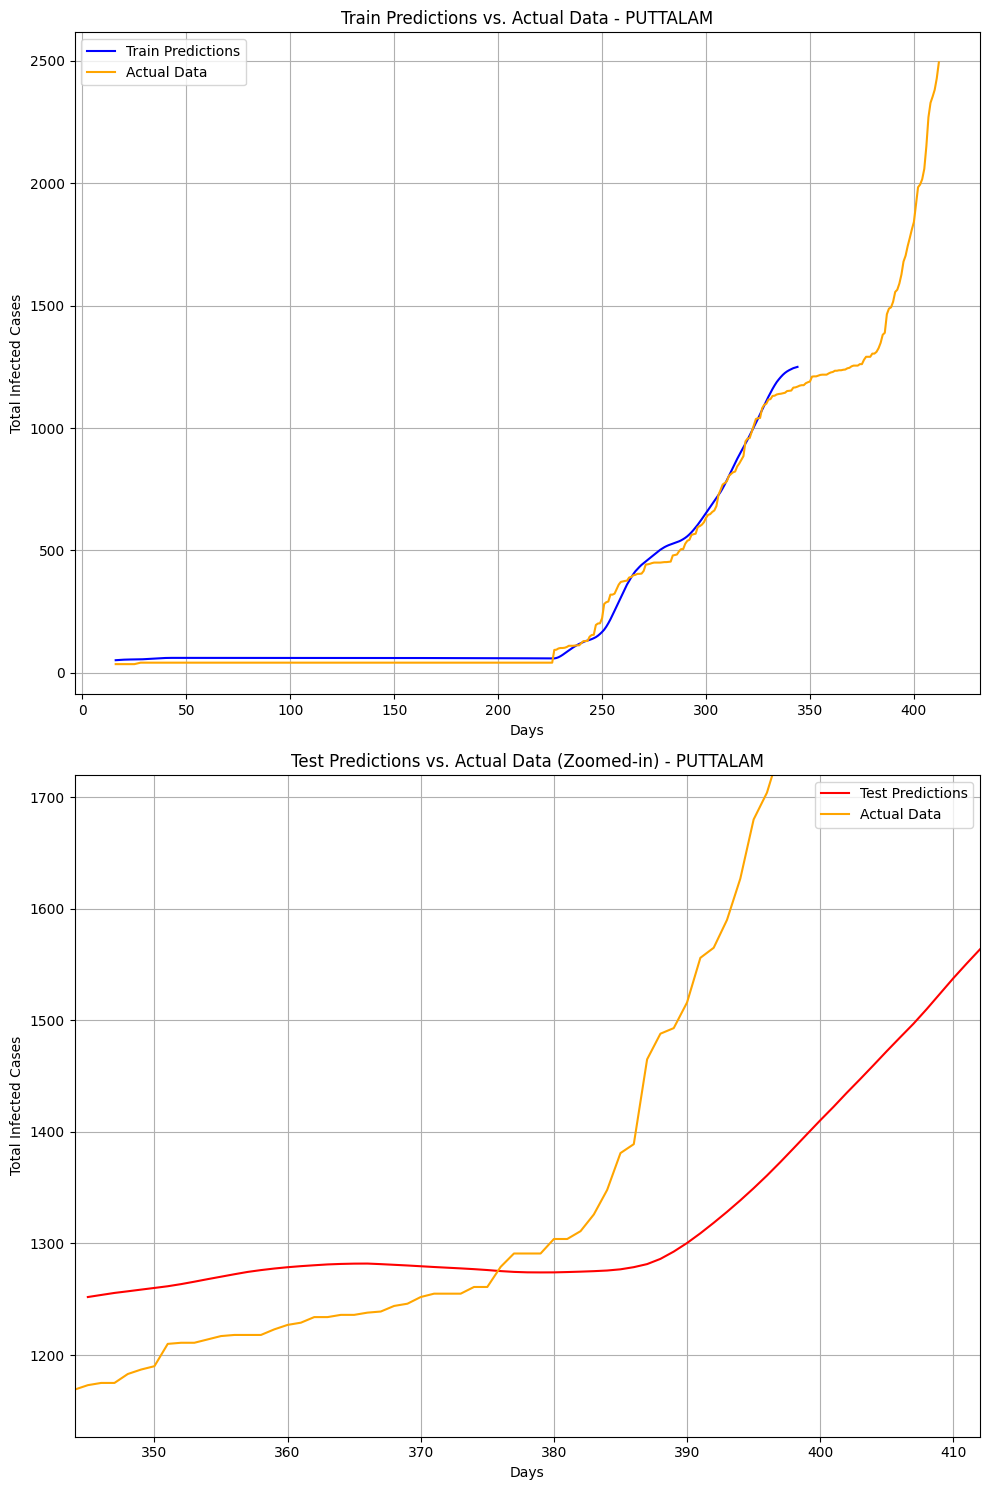

Processing RATNAPURA...


d:\conda\envs\SIR_model\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


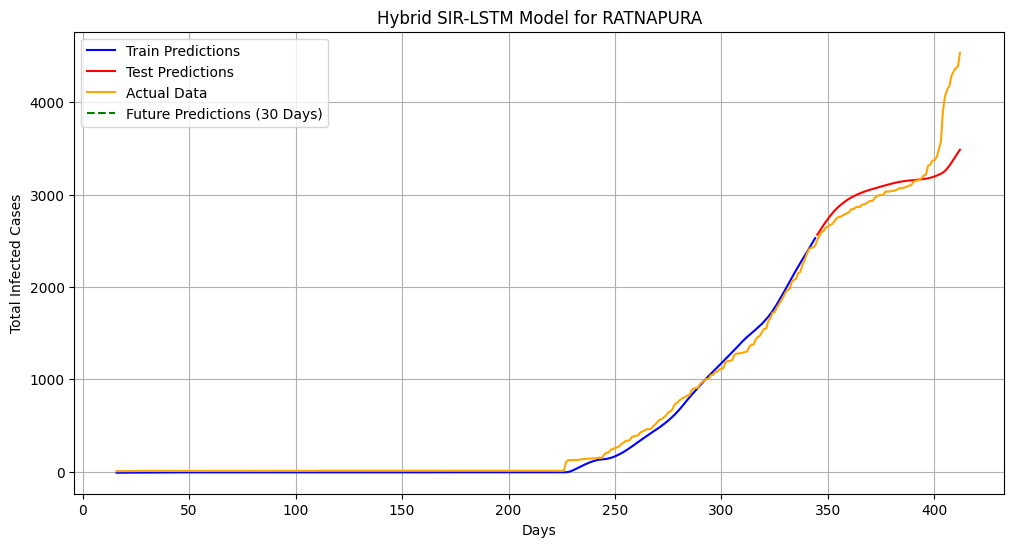

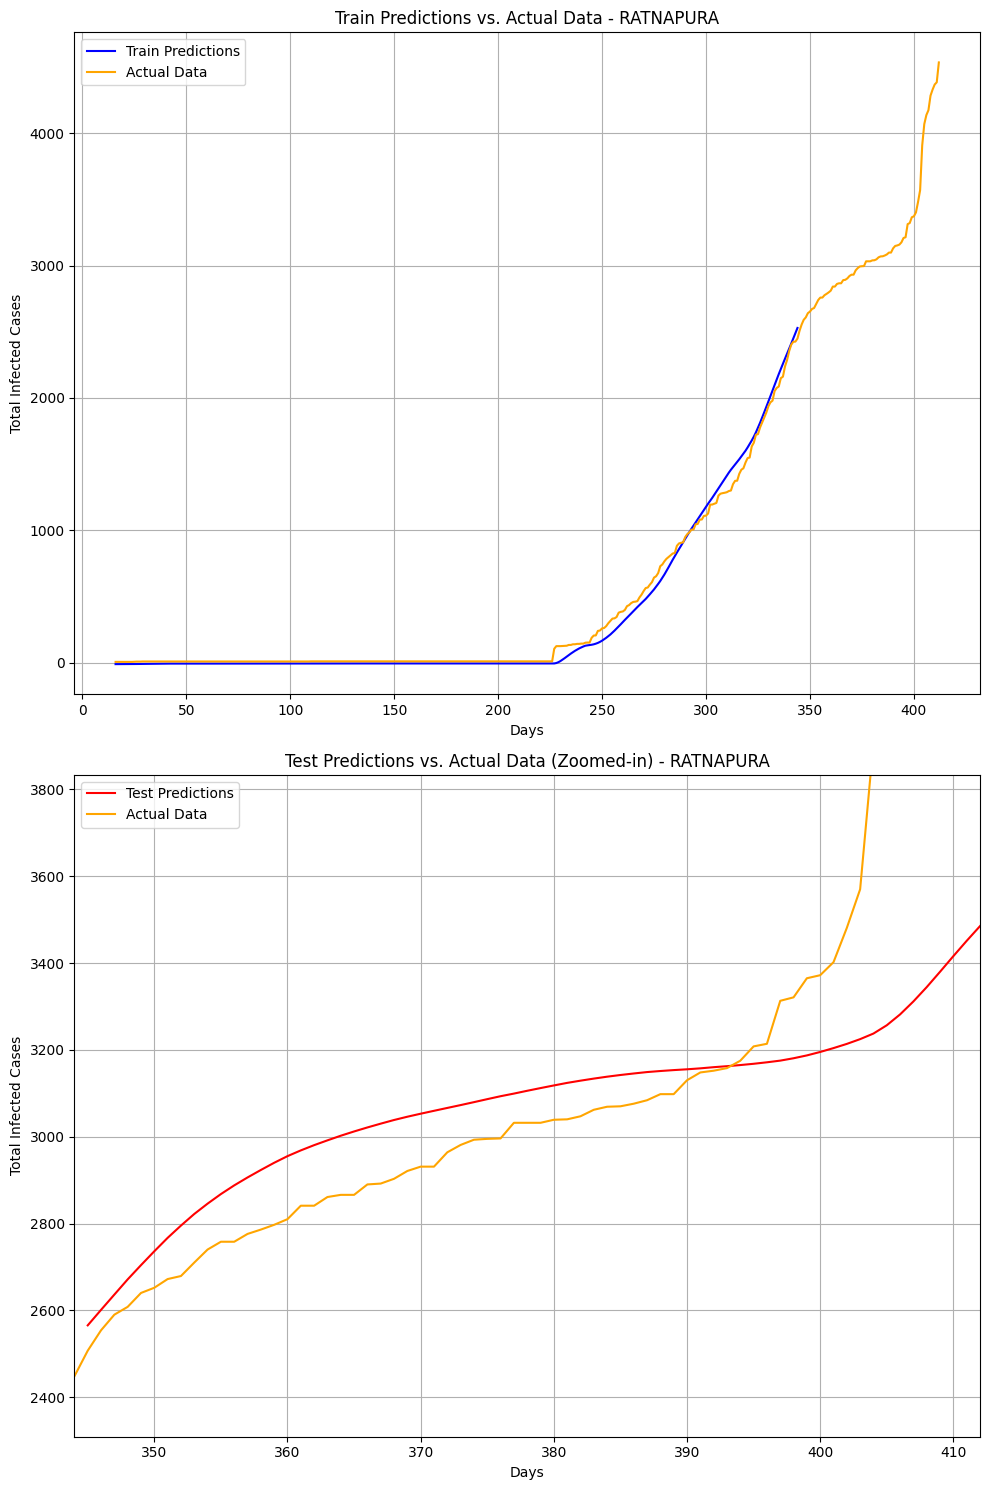

Processing TRINCOMALEE...


d:\conda\envs\SIR_model\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


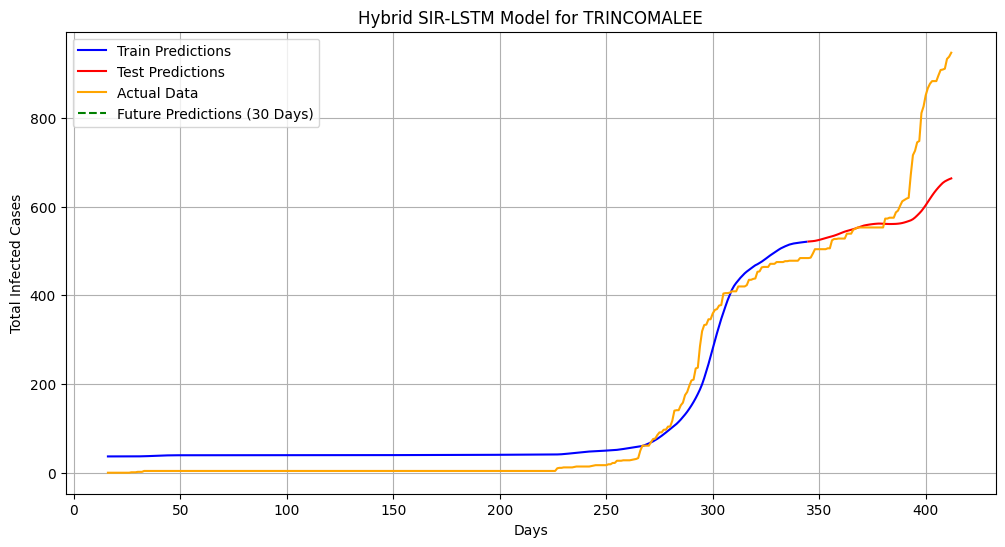

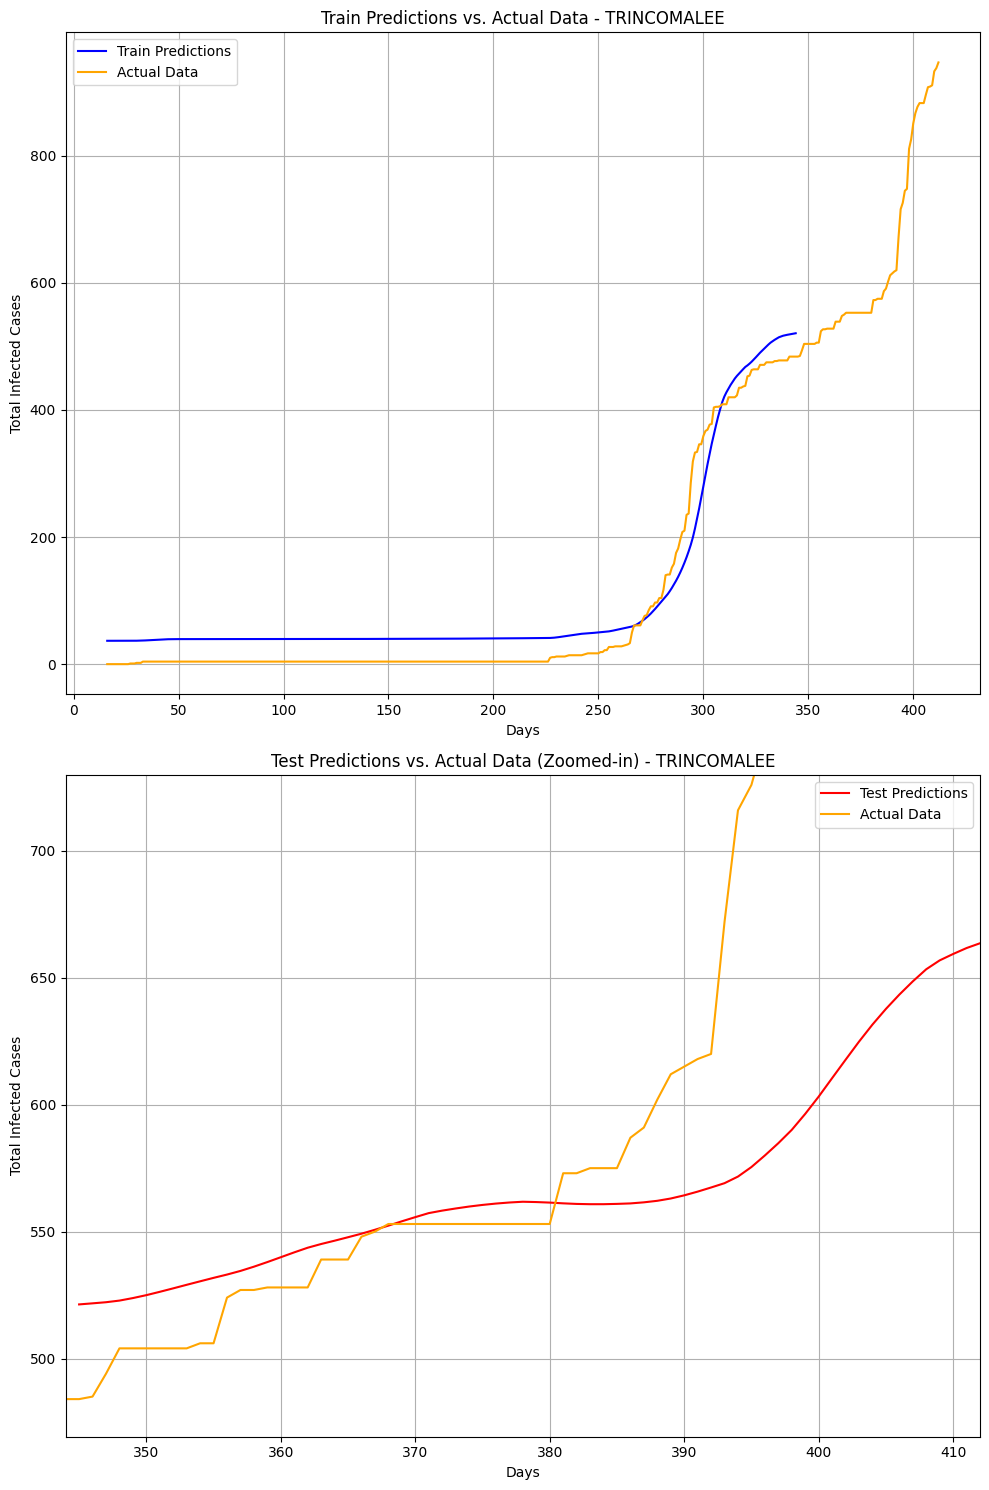

Processing VAVUNIYA...


d:\conda\envs\SIR_model\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


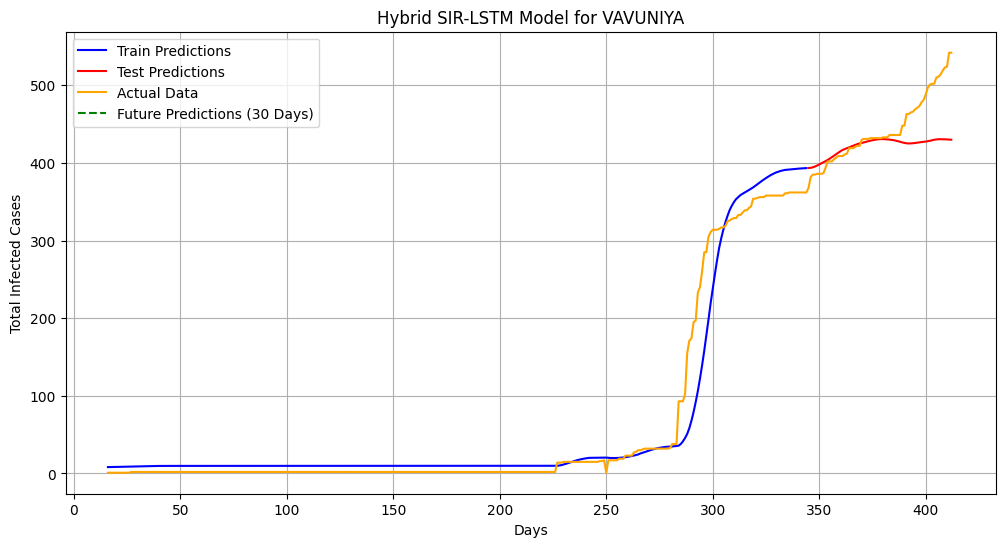

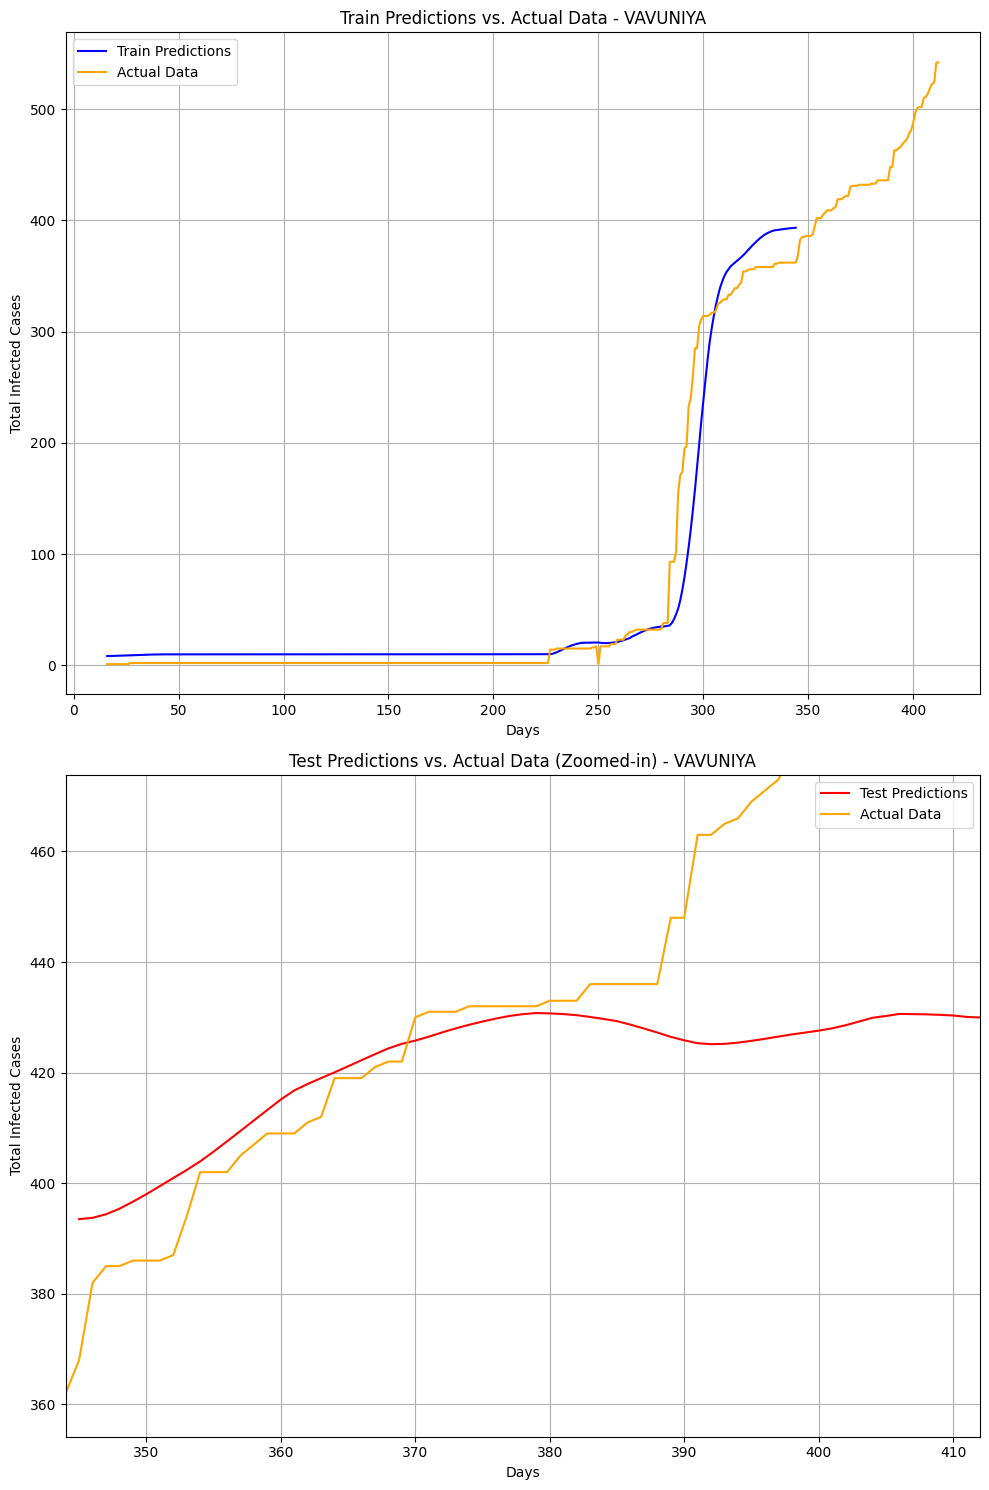

In [17]:
# Loop through each district and perform SIR + LSTM prediction
for district in districts:
    if district in df.columns:
        print(f"Processing {district}...")

        # Extract actual infected data for the district
        ydata = df[district].fillna(0).values
        
        # Use district population if available, otherwise use default
        N = district_population.get(district, 1000000)
        
        # Forecast SIR model for past data + future days
        forecast_days = len(ydata) + future_days
        sus, inf, rec = SIR(N, b0, beta, gamma, hs, forecast_days)

        # Prepare dataset for LSTM
        data = pd.DataFrame({
            'Days': np.arange(1, forecast_days + 1),
            'SIR_Infected': inf,
        })

        # Append actual data (only for available days)
        data['Actual_Infected'] = np.nan
        data.loc[:len(ydata)-1, 'Actual_Infected'] = ydata

        # Normalize data
        scaler = StandardScaler()
        data_scaled = scaler.fit_transform(data[['SIR_Infected', 'Actual_Infected']])

        def create_dataset(data, look_back=30):
            X, y = [], []
            for i in range(len(data) - look_back):
                X.append(data[i:(i + look_back), :])
                y.append(data[i + look_back, 1])  # Predict Actual_Infected
            return np.array(X), np.array(y)

        X, y = create_dataset(data_scaled, look_back)

        # Split into train and test sets (80% past data for training)
        train_size = int(len(ydata) * 0.8)
        X_train, X_test = X[:train_size], X[train_size:len(ydata)-look_back]
        y_train, y_test = y[:train_size], y[train_size:len(ydata)-look_back]

        # Build LSTM Model
        model = Sequential([
            LSTM(64, input_shape=(look_back, 2), return_sequences=True, kernel_regularizer=l2(0.001)),  
            Dropout(0.3),
            LSTM(32, return_sequences=False, kernel_regularizer=l2(0.001)),  
            Dropout(0.3),
            Dense(1)
        ])

        model.compile(loss='mean_squared_error', optimizer='adam')

        # Train Model
        early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        history = model.fit(X_train, y_train, epochs=150, batch_size=32, 
                           validation_data=(X_test, y_test), callbacks=[early_stop], verbose=0)

        # Predict using LSTM
        train_predict = model.predict(X_train)
        test_predict = model.predict(X_test)

        # Future Prediction using SIR + LSTM
        X_future = X[-future_days:]  # Use last available time window to predict future
        future_predict = model.predict(X_future)

        # Inverse transform predictions
        train_predict = scaler.inverse_transform(np.concatenate((X_train[:, -1, 0].reshape(-1, 1), train_predict), axis=1))[:, 1]
        test_predict = scaler.inverse_transform(np.concatenate((X_test[:, -1, 0].reshape(-1, 1), test_predict), axis=1))[:, 1]
        future_predict = scaler.inverse_transform(np.concatenate((X_future[:, -1, 0].reshape(-1, 1), future_predict), axis=1))[:, 1]

        # Plot results
        plt.figure(figsize=(12, 6))
        plt.plot(data['Days'][look_back:train_size + look_back], train_predict, label='Train Predictions', color='blue')
        plt.plot(data['Days'][train_size + look_back:len(ydata)], test_predict, label='Test Predictions', color='red')
        plt.plot(data['Days'][look_back:len(ydata)], data['Actual_Infected'][look_back:len(ydata)], label='Actual Data', color='orange')
        plt.plot(data['Days'][len(ydata):], future_predict, label='Future Predictions (30 Days)', linestyle='dashed', color='green')
        plt.title(f'Hybrid SIR-LSTM Model for {district}')
        plt.xlabel('Days')
        plt.ylabel('Total Infected Cases')
        plt.legend()
        plt.grid(True)
        plt.savefig(f'{district}_Prediction.png', dpi=300)
        plt.show()

        # Create zoomed views (like in the first code)
        fig, axes = plt.subplots(2, 1, figsize=(10, 15))
        
        # Plot Train Predictions
        axes[0].plot(data['Days'][look_back:train_size + look_back], train_predict, label='Train Predictions', color='blue')
        axes[0].plot(data['Days'][look_back:len(ydata)], data['Actual_Infected'][look_back:len(ydata)], label='Actual Data', color='orange')
        axes[0].set_title(f'Train Predictions vs. Actual Data - {district}')
        axes[0].set_xlabel('Days')
        axes[0].set_ylabel('Total Infected Cases')
        axes[0].legend()
        axes[0].grid(True)

        # Plot Test Predictions (Zoomed-in)
        axes[1].plot(data['Days'][train_size + look_back:len(ydata)], test_predict, label='Test Predictions', color='red')
        axes[1].plot(data['Days'][look_back:len(ydata)], data['Actual_Infected'][look_back:len(ydata)], label='Actual Data', color='orange')

        # Set zoom-in limits for better visualization
        axes[1].set_xlim([train_size + look_back, len(ydata)])  # Zoom into test period
        if len(test_predict) > 0:
            axes[1].set_ylim([min(test_predict) * 0.9, max(test_predict) * 1.1])  # Adjust y-axis range

        axes[1].set_title(f'Test Predictions vs. Actual Data (Zoomed-in) - {district}')
        axes[1].set_xlabel('Days')
        axes[1].set_ylabel('Total Infected Cases')
        axes[1].legend()
        axes[1].grid(True)

        # Adjust layout & save
        plt.tight_layout()
        plt.savefig(f'{district}_Zoomed_Predictions.png', dpi=300)
        plt.show()

Processing AMPARA...

AMPARA - Training Set Evaluation:
MSE: 650.0883
RMSE: 25.4968
MAE: 13.8398
MAPE: 274.11%
R²: 0.9562

AMPARA - Testing Set Evaluation:
MSE: 1694.1973
RMSE: 41.1606
MAE: 26.3002
MAPE: 5.43%
R²: 0.0727


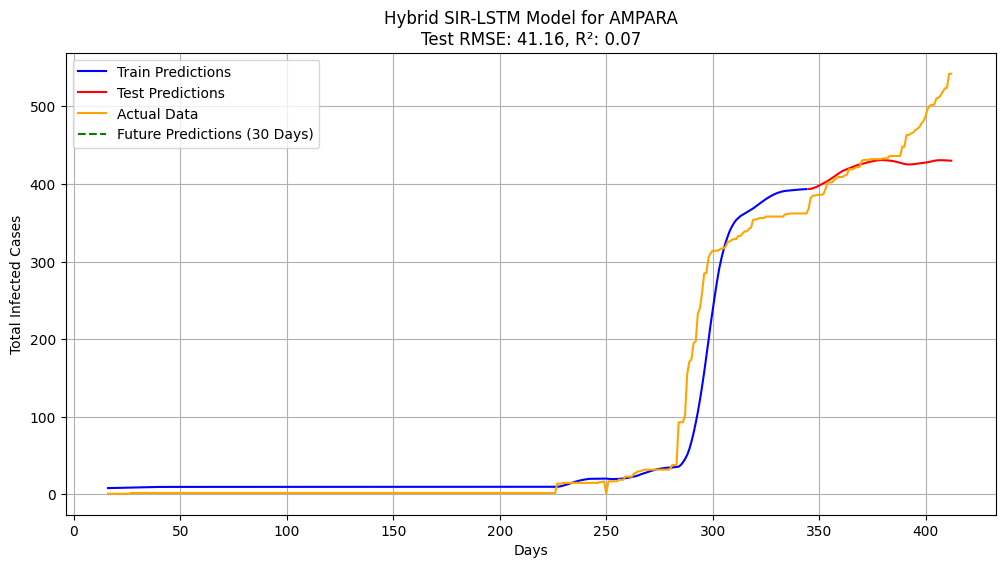

Processing ANURADHAPURA...

ANURADHAPURA - Training Set Evaluation:
MSE: 650.0883
RMSE: 25.4968
MAE: 13.8398
MAPE: 274.11%
R²: 0.9562

ANURADHAPURA - Testing Set Evaluation:
MSE: 1694.1973
RMSE: 41.1606
MAE: 26.3002
MAPE: 5.43%
R²: 0.0727


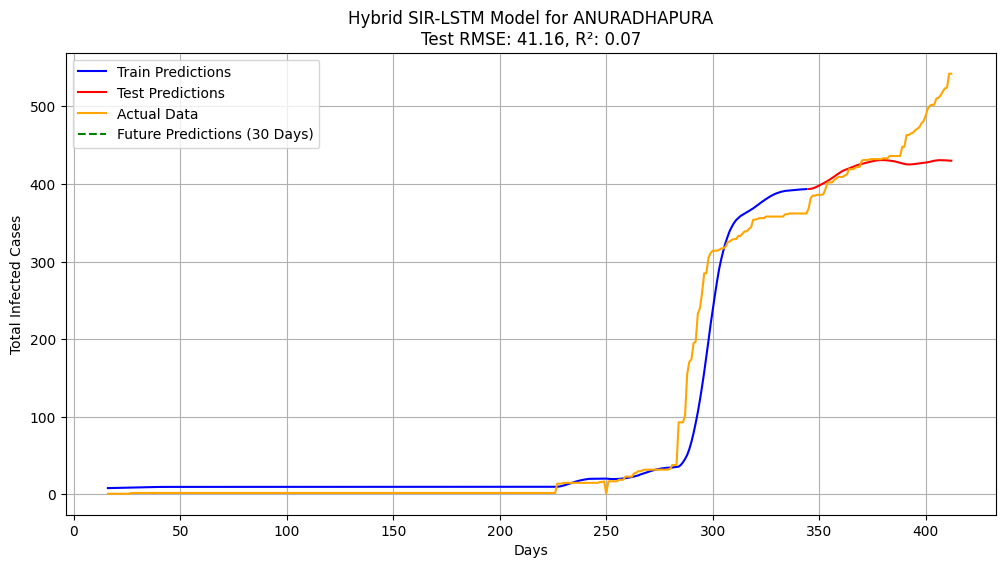

Processing BADULLA...

BADULLA - Training Set Evaluation:
MSE: 650.0883
RMSE: 25.4968
MAE: 13.8398
MAPE: 274.11%
R²: 0.9562

BADULLA - Testing Set Evaluation:
MSE: 1694.1973
RMSE: 41.1606
MAE: 26.3002
MAPE: 5.43%
R²: 0.0727


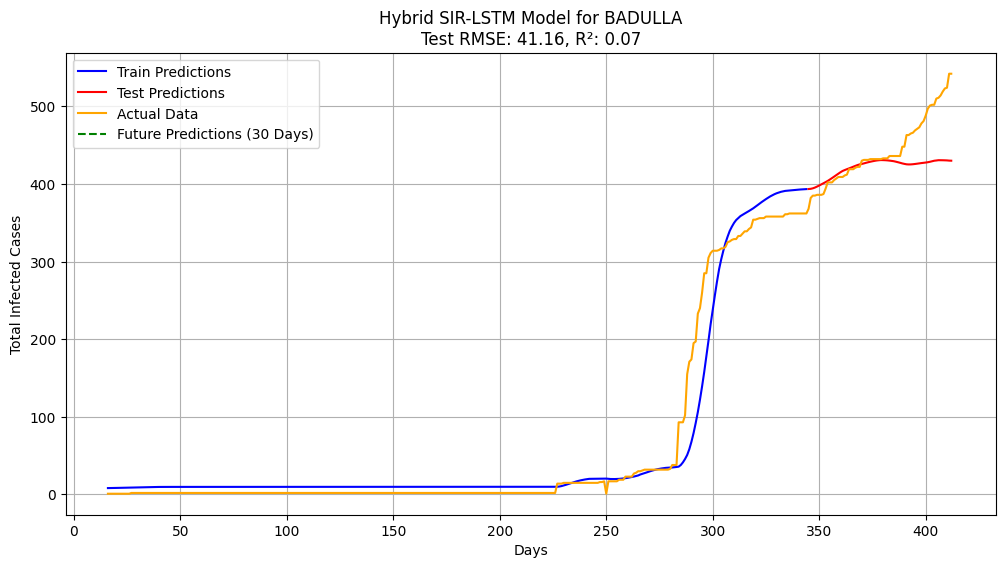

Processing BATTICALOA...

BATTICALOA - Training Set Evaluation:
MSE: 650.0883
RMSE: 25.4968
MAE: 13.8398
MAPE: 274.11%
R²: 0.9562

BATTICALOA - Testing Set Evaluation:
MSE: 1694.1973
RMSE: 41.1606
MAE: 26.3002
MAPE: 5.43%
R²: 0.0727


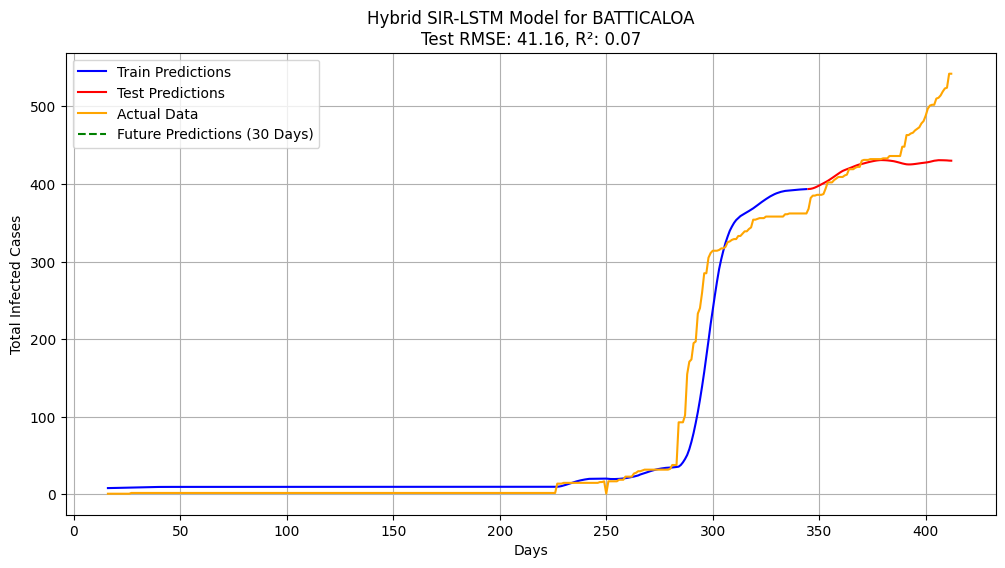

Processing COLOMBO...

COLOMBO - Training Set Evaluation:
MSE: 650.0883
RMSE: 25.4968
MAE: 13.8398
MAPE: 274.11%
R²: 0.9562

COLOMBO - Testing Set Evaluation:
MSE: 1694.1973
RMSE: 41.1606
MAE: 26.3002
MAPE: 5.43%
R²: 0.0727


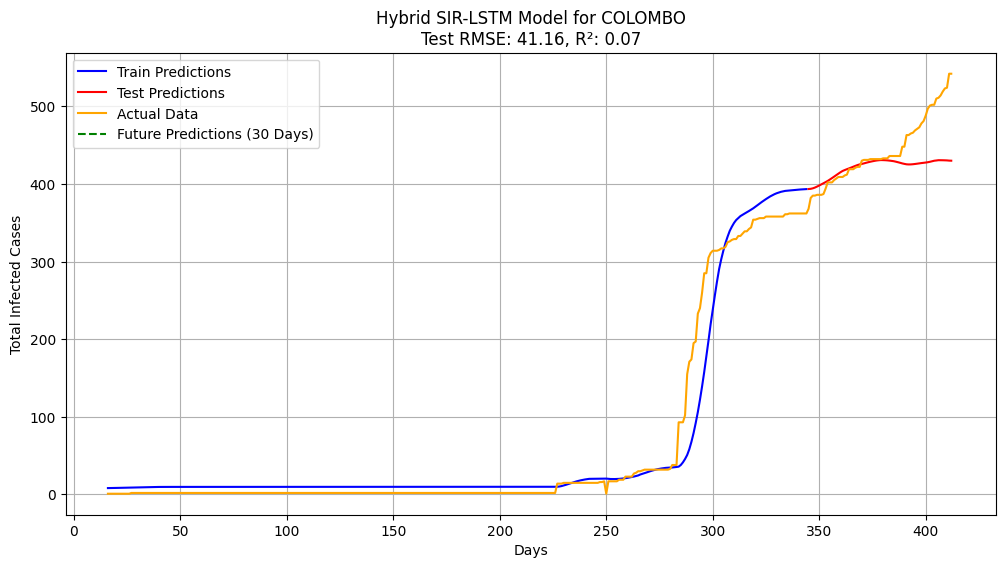

Processing GALLE...

GALLE - Training Set Evaluation:
MSE: 650.0883
RMSE: 25.4968
MAE: 13.8398
MAPE: 274.11%
R²: 0.9562

GALLE - Testing Set Evaluation:
MSE: 1694.1973
RMSE: 41.1606
MAE: 26.3002
MAPE: 5.43%
R²: 0.0727


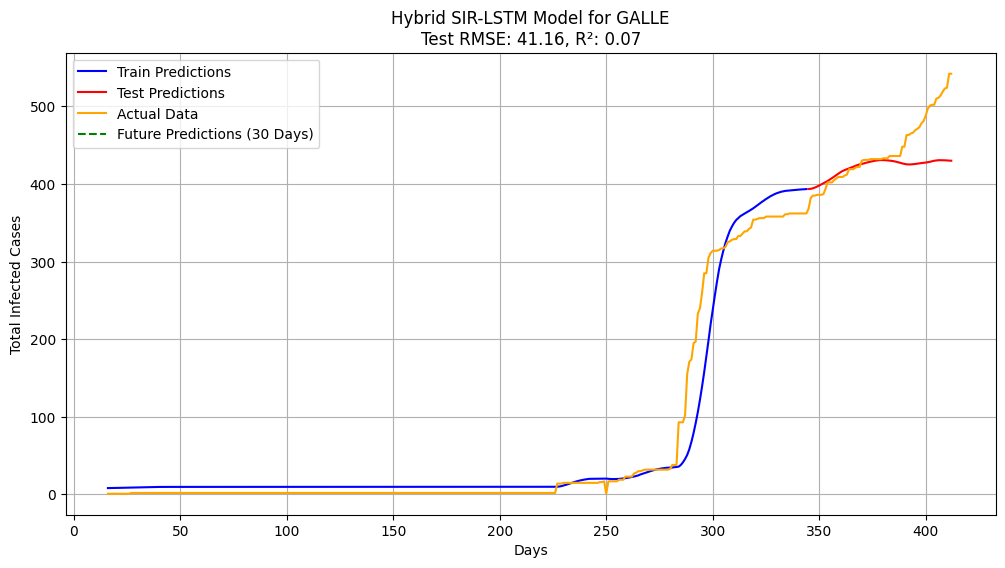

Processing GAMPAHA...

GAMPAHA - Training Set Evaluation:
MSE: 650.0883
RMSE: 25.4968
MAE: 13.8398
MAPE: 274.11%
R²: 0.9562

GAMPAHA - Testing Set Evaluation:
MSE: 1694.1973
RMSE: 41.1606
MAE: 26.3002
MAPE: 5.43%
R²: 0.0727


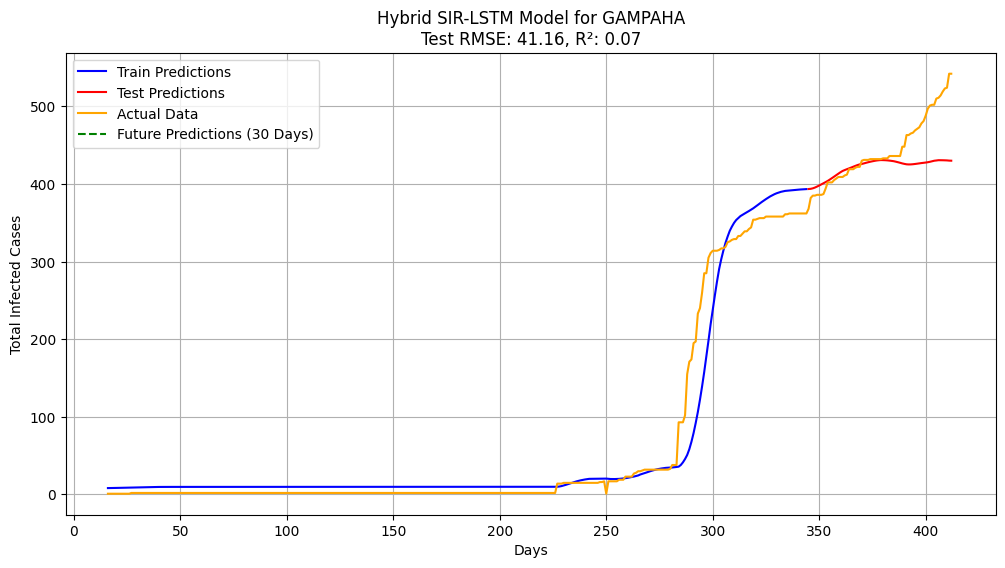

Processing HAMBANTOTA...

HAMBANTOTA - Training Set Evaluation:
MSE: 650.0883
RMSE: 25.4968
MAE: 13.8398
MAPE: 274.11%
R²: 0.9562

HAMBANTOTA - Testing Set Evaluation:
MSE: 1694.1973
RMSE: 41.1606
MAE: 26.3002
MAPE: 5.43%
R²: 0.0727


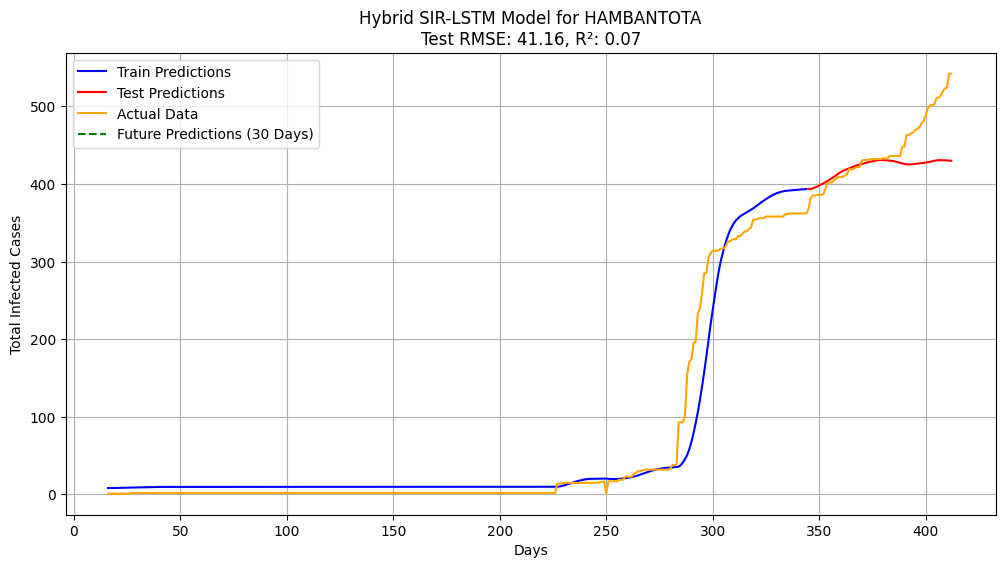

Processing JAFFNA...

JAFFNA - Training Set Evaluation:
MSE: 650.0883
RMSE: 25.4968
MAE: 13.8398
MAPE: 274.11%
R²: 0.9562

JAFFNA - Testing Set Evaluation:
MSE: 1694.1973
RMSE: 41.1606
MAE: 26.3002
MAPE: 5.43%
R²: 0.0727


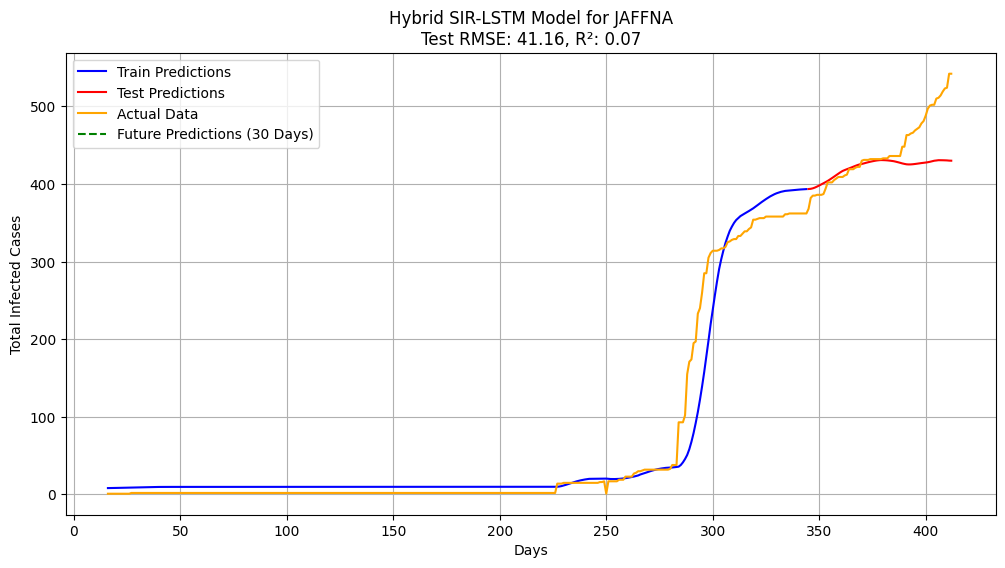

Processing NUWARA ELIYA...

NUWARA ELIYA - Training Set Evaluation:
MSE: 650.0883
RMSE: 25.4968
MAE: 13.8398
MAPE: 274.11%
R²: 0.9562

NUWARA ELIYA - Testing Set Evaluation:
MSE: 1694.1973
RMSE: 41.1606
MAE: 26.3002
MAPE: 5.43%
R²: 0.0727


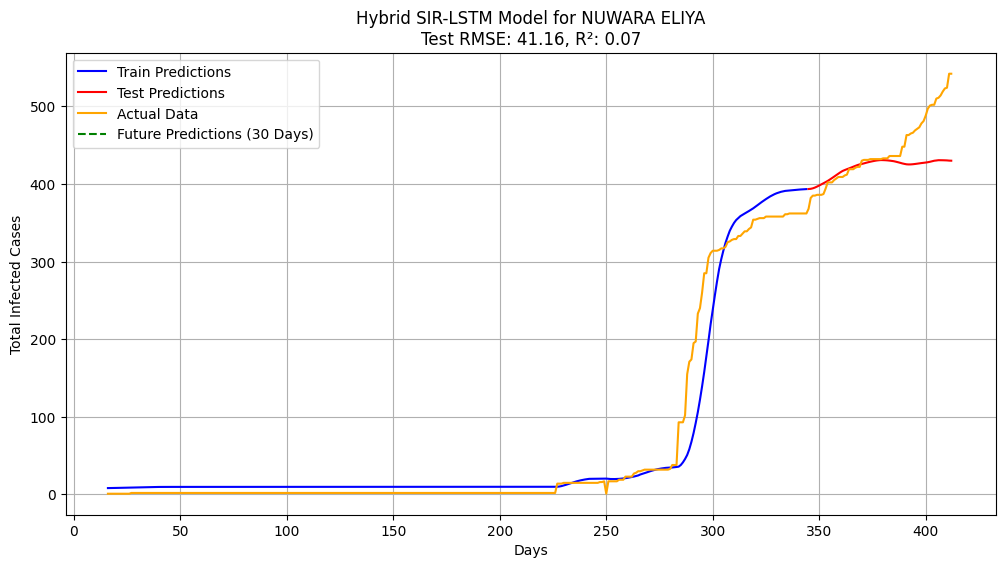

Processing POLONNARUWA...

POLONNARUWA - Training Set Evaluation:
MSE: 650.0883
RMSE: 25.4968
MAE: 13.8398
MAPE: 274.11%
R²: 0.9562

POLONNARUWA - Testing Set Evaluation:
MSE: 1694.1973
RMSE: 41.1606
MAE: 26.3002
MAPE: 5.43%
R²: 0.0727


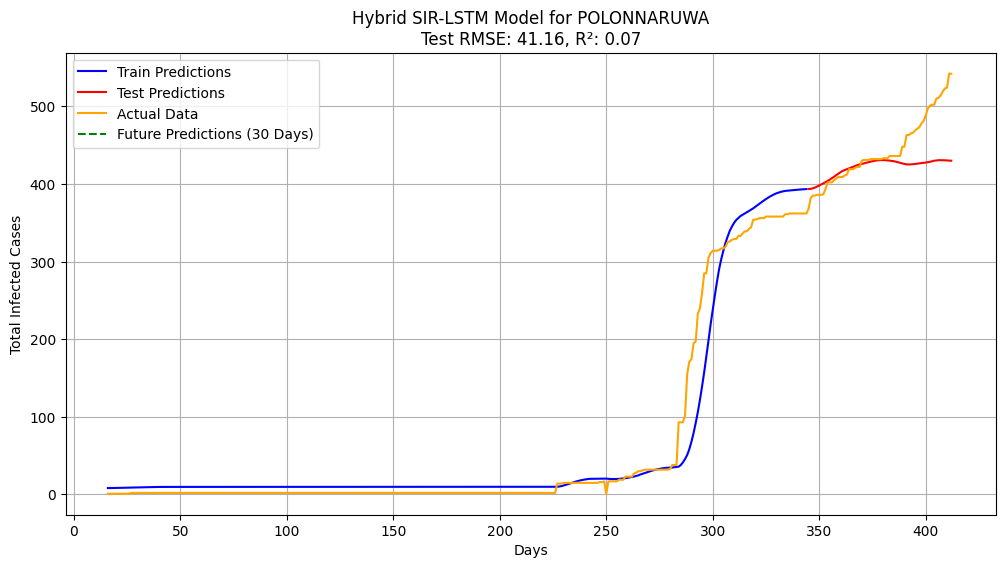

Processing PUTTALAM...

PUTTALAM - Training Set Evaluation:
MSE: 650.0883
RMSE: 25.4968
MAE: 13.8398
MAPE: 274.11%
R²: 0.9562

PUTTALAM - Testing Set Evaluation:
MSE: 1694.1973
RMSE: 41.1606
MAE: 26.3002
MAPE: 5.43%
R²: 0.0727


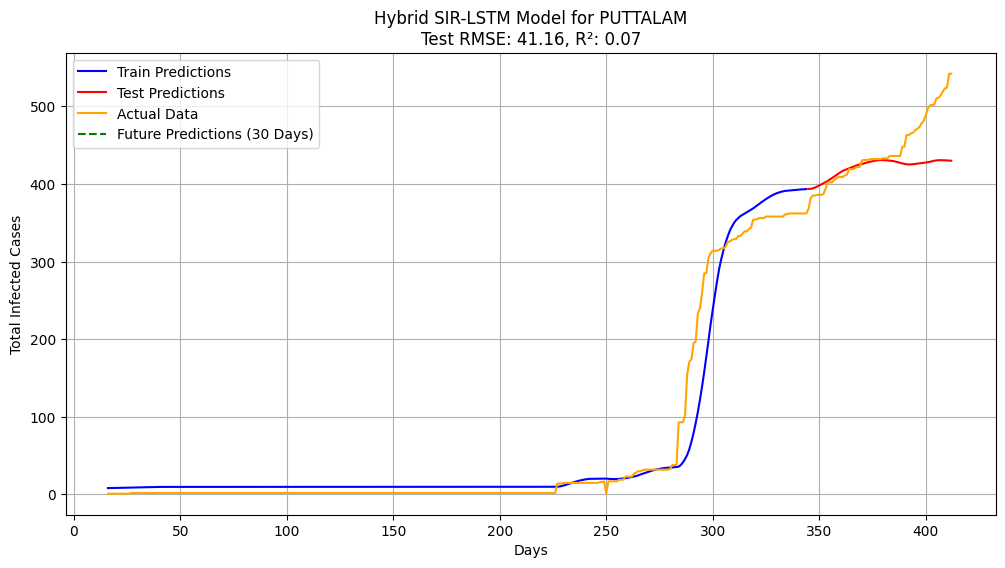

Processing RATNAPURA...

RATNAPURA - Training Set Evaluation:
MSE: 650.0883
RMSE: 25.4968
MAE: 13.8398
MAPE: 274.11%
R²: 0.9562

RATNAPURA - Testing Set Evaluation:
MSE: 1694.1973
RMSE: 41.1606
MAE: 26.3002
MAPE: 5.43%
R²: 0.0727


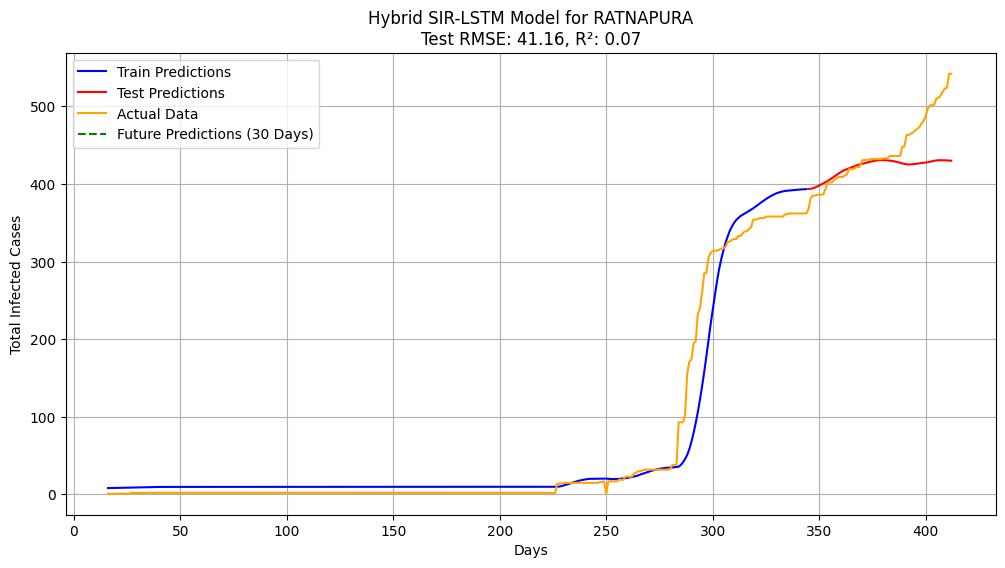

Processing TRINCOMALEE...

TRINCOMALEE - Training Set Evaluation:
MSE: 650.0883
RMSE: 25.4968
MAE: 13.8398
MAPE: 274.11%
R²: 0.9562

TRINCOMALEE - Testing Set Evaluation:
MSE: 1694.1973
RMSE: 41.1606
MAE: 26.3002
MAPE: 5.43%
R²: 0.0727


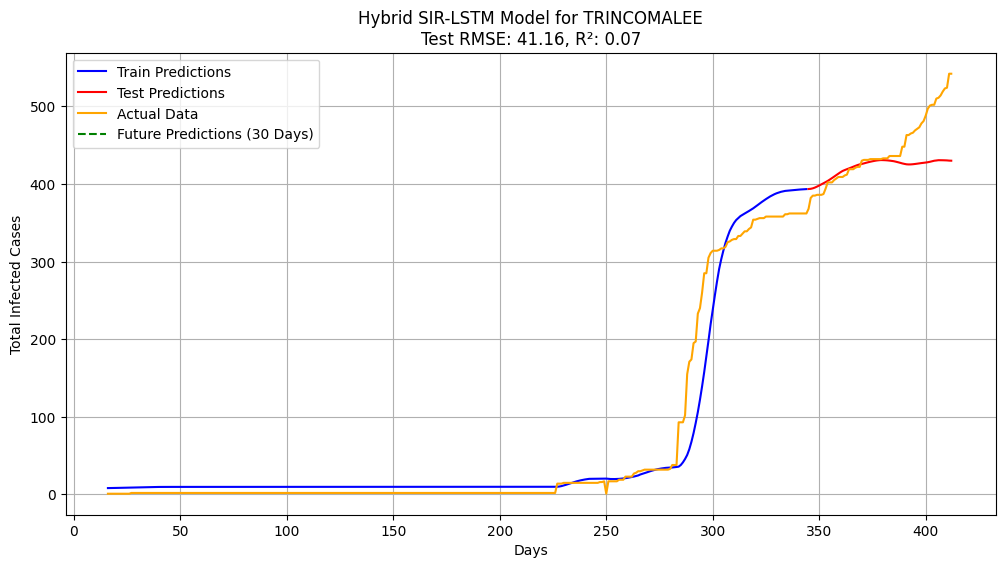

Processing VAVUNIYA...

VAVUNIYA - Training Set Evaluation:
MSE: 650.0883
RMSE: 25.4968
MAE: 13.8398
MAPE: 274.11%
R²: 0.9562

VAVUNIYA - Testing Set Evaluation:
MSE: 1694.1973
RMSE: 41.1606
MAE: 26.3002
MAPE: 5.43%
R²: 0.0727


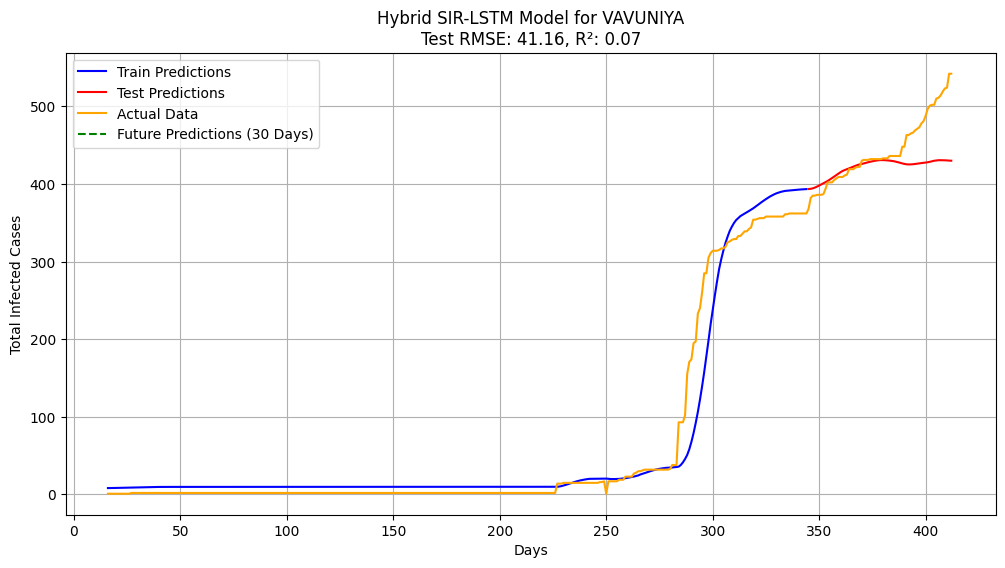


Model Performance Comparison Across Districts:
        District  Train RMSE  Train R²  Test RMSE   Test R²
0         AMPARA   25.496829  0.956165  41.160628  0.072653
1   ANURADHAPURA   25.496829  0.956165  41.160628  0.072653
2        BADULLA   25.496829  0.956165  41.160628  0.072653
3     BATTICALOA   25.496829  0.956165  41.160628  0.072653
4        COLOMBO   25.496829  0.956165  41.160628  0.072653
5          GALLE   25.496829  0.956165  41.160628  0.072653
6        GAMPAHA   25.496829  0.956165  41.160628  0.072653
7     HAMBANTOTA   25.496829  0.956165  41.160628  0.072653
8         JAFFNA   25.496829  0.956165  41.160628  0.072653
9   NUWARA ELIYA   25.496829  0.956165  41.160628  0.072653
10   POLONNARUWA   25.496829  0.956165  41.160628  0.072653
11      PUTTALAM   25.496829  0.956165  41.160628  0.072653
12     RATNAPURA   25.496829  0.956165  41.160628  0.072653
13   TRINCOMALEE   25.496829  0.956165  41.160628  0.072653
14      VAVUNIYA   25.496829  0.956165  41.160628  0

<Figure size 1400x800 with 0 Axes>

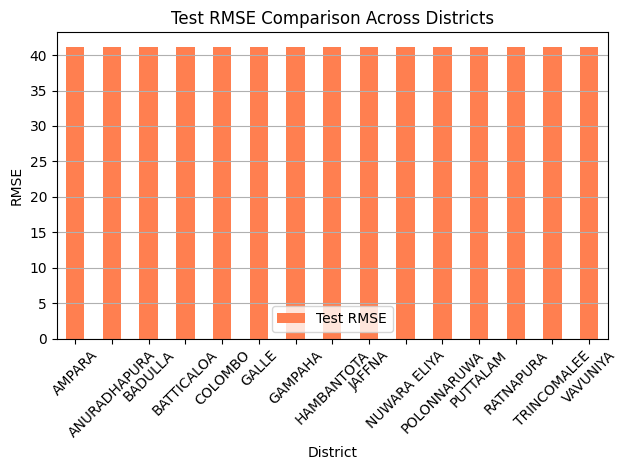

<Figure size 1400x800 with 0 Axes>

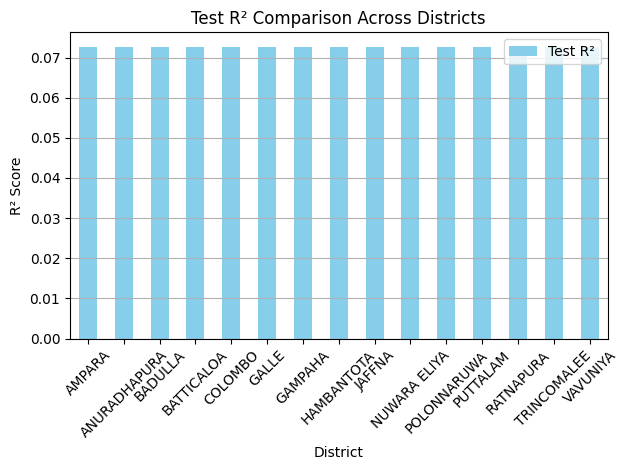

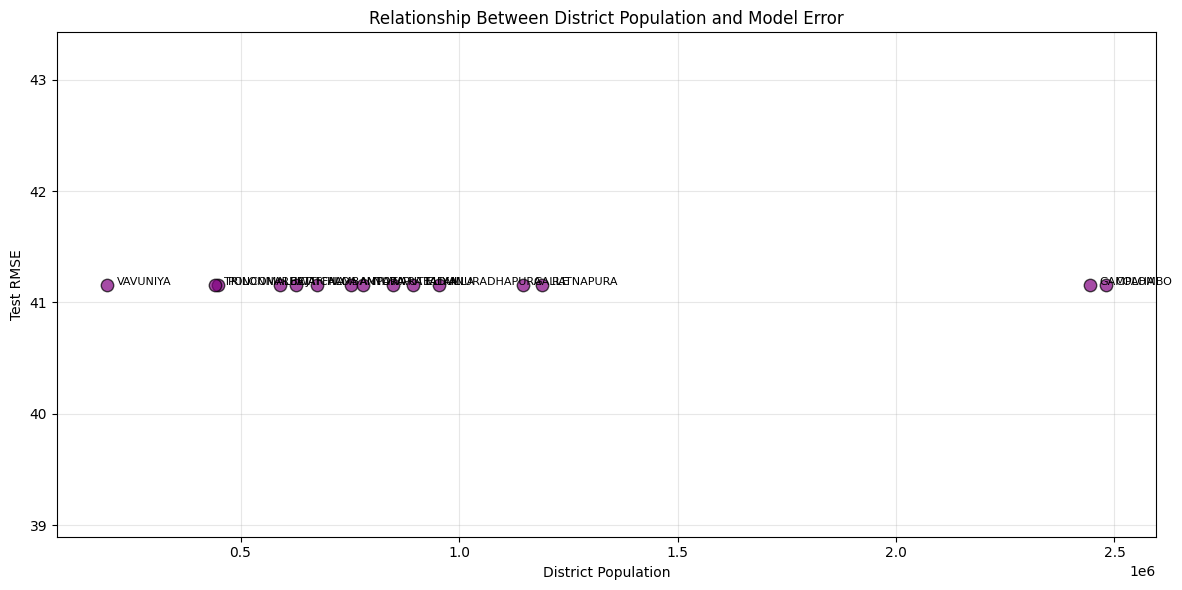

In [18]:
# Add after the predictions section for each district
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

# Model Evaluation Metrics
def evaluate_model(y_true, y_pred, district_name, prediction_type):
    """
    Evaluate model performance using various metrics
    
    Args:
        y_true: Actual values
        y_pred: Predicted values
        district_name: Name of the district
        prediction_type: Either 'Training' or 'Testing'
    
    Returns:
        Dictionary of evaluation metrics
    """
    # Convert to numpy arrays if they're not already
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Remove any NaN values
    mask = ~np.isnan(y_true) & ~np.isnan(y_pred)
    y_true = y_true[mask]
    y_pred = y_pred[mask]
    
    if len(y_true) == 0 or len(y_pred) == 0:
        print(f"No valid data for {district_name} {prediction_type} evaluation")
        return None
    
    # Calculate metrics
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    
    # Calculate MAPE (Mean Absolute Percentage Error)
    # Add small epsilon to avoid division by zero
    mape = np.mean(np.abs((y_true - y_pred) / (y_true + 1e-10))) * 100
    
    # Calculate R-squared
    r2 = r2_score(y_true, y_pred)
    
    # Print and return results
    print(f"\n{district_name} - {prediction_type} Set Evaluation:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"MAPE: {mape:.2f}%")
    print(f"R²: {r2:.4f}")
    
    return {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'MAPE': mape,
        'R2': r2
    }

# For storing all district metrics
all_district_metrics = {}

# Loop through each district and perform SIR + LSTM prediction
for district in districts:
    if district in df.columns:
        print(f"Processing {district}...")
        # ... [your existing code here] ...
        
        # After making predictions, evaluate the model
        # Training evaluation
        y_train_true = data['Actual_Infected'][look_back:train_size + look_back].values
        train_metrics = evaluate_model(y_train_true, train_predict, district, "Training")
        
        # Testing evaluation
        y_test_true = data['Actual_Infected'][train_size + look_back:len(ydata)].values
        test_metrics = evaluate_model(y_test_true, test_predict, district, "Testing")
        
        # Store metrics
        all_district_metrics[district] = {
            'train': train_metrics,
            'test': test_metrics
        }
        
        # Plot results with metrics in the title
        plt.figure(figsize=(12, 6))
        plt.plot(data['Days'][look_back:train_size + look_back], train_predict, label='Train Predictions', color='blue')
        plt.plot(data['Days'][train_size + look_back:len(ydata)], test_predict, label='Test Predictions', color='red')
        plt.plot(data['Days'][look_back:len(ydata)], data['Actual_Infected'][look_back:len(ydata)], label='Actual Data', color='orange')
        plt.plot(data['Days'][len(ydata):], future_predict, label='Future Predictions (30 Days)', linestyle='dashed', color='green')
        
        # Add RMSE and R² to title
        if test_metrics:
            plt.title(f'Hybrid SIR-LSTM Model for {district}\nTest RMSE: {test_metrics["RMSE"]:.2f}, R²: {test_metrics["R2"]:.2f}')
        else:
            plt.title(f'Hybrid SIR-LSTM Model for {district}')
        
        plt.xlabel('Days')
        plt.ylabel('Total Infected Cases')
        plt.legend()
        plt.grid(True)
        plt.savefig(f'{district}_Prediction_with_metrics.png', dpi=300)
        plt.show()
        
        # ... [rest of your existing visualization code] ...

# After processing all districts, create a comparison table
comparison_df = pd.DataFrame(columns=['District', 'Train RMSE', 'Train R²', 'Test RMSE', 'Test R²'])

row_idx = 0
for district, metrics in all_district_metrics.items():
    train_rmse = metrics['train']['RMSE'] if metrics['train'] else np.nan
    train_r2 = metrics['train']['R2'] if metrics['train'] else np.nan
    test_rmse = metrics['test']['RMSE'] if metrics['test'] else np.nan
    test_r2 = metrics['test']['R2'] if metrics['test'] else np.nan
    
    comparison_df.loc[row_idx] = [district, train_rmse, train_r2, test_rmse, test_r2]
    row_idx += 1

# Sort by Test RMSE (ascending)
comparison_df = comparison_df.sort_values('Test RMSE')

# Display the comparison table
print("\nModel Performance Comparison Across Districts:")
print(comparison_df)

# Save the comparison table
comparison_df.to_csv('district_model_performance_comparison.csv', index=False)

# Create a bar chart to visualize test RMSE across districts
plt.figure(figsize=(14, 8))
comparison_df.plot(x='District', y='Test RMSE', kind='bar', color='coral')
plt.title('Test RMSE Comparison Across Districts')
plt.xlabel('District')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('district_rmse_comparison.png', dpi=300)
plt.show()

# Create a bar chart to visualize test R² across districts
plt.figure(figsize=(14, 8))
comparison_df.plot(x='District', y='Test R²', kind='bar', color='skyblue')
plt.title('Test R² Comparison Across Districts')
plt.xlabel('District')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('district_r2_comparison.png', dpi=300)
plt.show()

# Create a combined visualization of model error vs district population
district_population_series = pd.Series(district_population)
error_vs_population = pd.DataFrame({
    'District': comparison_df['District'],
    'Test RMSE': comparison_df['Test RMSE'],
    'Population': [district_population.get(d, 0) for d in comparison_df['District']]
})

plt.figure(figsize=(12, 6))
plt.scatter(error_vs_population['Population'], error_vs_population['Test RMSE'], 
           s=80, alpha=0.7, c='purple', edgecolors='black')

# Add district labels to points
for i, row in error_vs_population.iterrows():
    plt.annotate(row['District'], 
                (row['Population'], row['Test RMSE']),
                xytext=(7, 0), 
                textcoords='offset points',
                fontsize=8)

plt.title('Relationship Between District Population and Model Error')
plt.xlabel('District Population')
plt.ylabel('Test RMSE')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('population_vs_error.png', dpi=300)
plt.show()